# Rainfall Prediction - Weather Forecasting Project
Problem Statement:

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

Problem Statement: a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:

Number of columns: 23

Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

Showing all the columns of the DataFrame

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Exploretory Data Analysis(EDA)

In [6]:
df.shape

(8425, 23)

Checking NULL values

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Now presenting percentage of missing values

In [9]:
(df.isnull().sum()/8425*100).sort_values(ascending=False)

Sunshine         47.406528
Evaporation      41.685460
Cloud3pm         29.139466
Cloud9am         28.735905
Pressure3pm      15.572700
Pressure9am      15.537092
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
RainToday         2.848665
Rainfall          2.848665
RainTomorrow      2.836795
WindSpeed3pm      1.270030
Humidity3pm       1.210682
Temp3pm           1.139466
WindSpeed9am      0.902077
MinTemp           0.890208
MaxTemp           0.712166
Humidity9am       0.700297
Temp9am           0.664688
Location          0.000000
Date              0.000000
dtype: float64

we can see that there are lot of missing value present in the dataset.we will control this later.

Now checking information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Two type of value present in the dataFrame

-object

-float

Now Describing the Dataset

In [11]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

we can see that the difference between 75th percentile and maximum value is high in 'Rainfall','Evaporation','WindGustSpeed','WindSpeed9am' columns. It means that there are many outliers are in this column.

mean value and 50th percentile are almost same those columns are 'MinTemp','MaxTemp','WindSpeed9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am'. no skewness is in this columns

Now visualizating missing value check using heatmap

<AxesSubplot:>

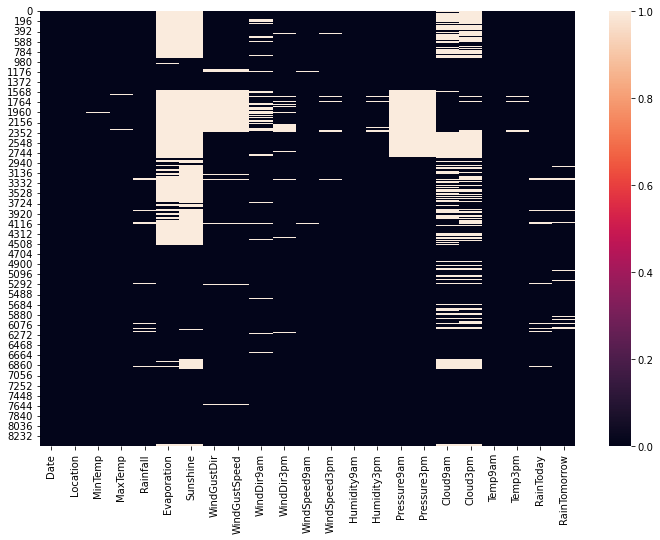

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

There are many missing values in the dataframe

Now we divide all the columns into categorical and numerical types

In [13]:
df.dtypes.index

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

 checking for categorical columns

In [16]:
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
[0, 1, 7, 9, 10, 21, 22]


In [17]:
len(categorical_columns)

7

Now checking for numerical columns

In [21]:
numerical_columns = []
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
[2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [22]:
len(numerical_columns)

16

# Univariate Analysis

categorical columns

column_name Date


2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
len= 3004


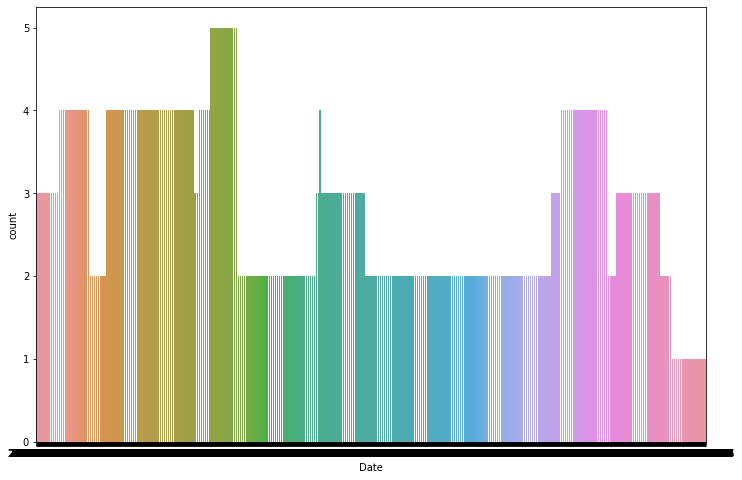



####################################################################################################


In [24]:
i=0
print("column_name",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(df[df.columns[i]])
print('len=',len(df[df.columns[i]].value_counts()))
plt.show()
print('\n')
print('#'*100)

In [25]:
df[df['Date']=='2011-05-26']

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
876   2011-05-26        Albury      1.3     14.9       0.0          NaN   
5088  2011-05-26     Melbourne      9.6     14.5       0.0          1.8   
5899  2011-05-26     Melbourne      9.6     14.5       0.0          1.8   
6245  2011-05-26      Brisbane     11.0     22.2       0.0          6.0   
7081  2011-05-26  PerthAirport     11.5     21.1       0.0          2.2   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
876        NaN         WSW           26.0        NaN  ...        75.0   
5088       1.1          SW           39.0        WSW  ...        70.0   
5899       1.1          SW           39.0        WSW  ...        70.0   
6245       9.6         WSW           24.0        WSW  ...        55.0   
7081       5.2           E           41.0        ENE  ...        53.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
876          52.0       1020.5       1018.6       NaN       NaN      6.6   
5088         77.0       1020.8       1018.7       7.0       7.0     11.5   
5899         77.0       1020.8       1018.7       7.0       7.0     11.5   
6245         43.0       1013.4       1012.2       1.0       2.0     16.4   
7081         41.0       1022.6       1019.3       6.0       5.0     16.5   

      Temp3pm  RainToday  RainTomorrow  
876      13.6         No            No  
5088     13.3         No           Yes  
5899     13.3         No           Yes  
6245     21.1         No            No  
7081     20.3         No            No  

[5 rows x 23 columns]

we are making three new columns(Day,Month,Year) from this column

In [26]:
df["Day"]=pd.to_datetime(df["Date"]).dt.day

In [27]:
df["Month"]=pd.to_datetime(df["Date"]).dt.month

In [28]:
df["Year"]=pd.to_datetime(df["Date"]).dt.year

In [29]:
df.sample(20)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6713  2012-09-05      Brisbane     11.1     23.7       0.0          6.6   
1901  2014-06-27     Newcastle      8.2     19.3       0.1          NaN   
3679  2015-10-25   Williamtown     10.8     27.8      24.8         18.0   
4912  2010-11-01     Melbourne      9.2     16.7       3.8          2.8   
6799  2014-08-18      Adelaide      6.2     14.7       0.0          5.2   
2154  2015-03-07     Newcastle     16.3     27.2       0.0          NaN   
6044  2011-10-18     Melbourne      7.5     25.1       0.0          4.4   
2533  2014-11-29       Penrith     14.3     33.1       0.0          NaN   
4944  2010-12-03     Melbourne     17.2     30.0       7.8          4.6   
3997  2016-09-07   Williamtown      7.2     22.7       0.0          3.4   
3302  2017-02-11   Williamtown     25.0     45.5       0.0          NaN   
7014  2011-02-18  PerthAirport     20.9     34.3       0.0          8.6   
7824  2013-08-05  PerthAirport     13.2     22.2       5.0          3.4   
2734  2015-06-18       Penrith      7.2     17.4       3.0          NaN   
1419  2010-08-04  CoffsHarbour      8.1     19.0       0.2          4.0   
2717  2015-06-01       Penrith      6.7     15.3       0.2          NaN   
1611  2013-09-10     Newcastle     15.2      NaN       0.0          NaN   
4436  2009-04-27    Wollongong     12.0     18.2       0.0          NaN   
4962  2010-12-21     Melbourne     11.1     18.3       0.0          4.2   
943   2009-04-15  CoffsHarbour     16.9     26.5       7.0          2.0   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  \
6713      10.7          NE           30.0         SW  ...      1019.0   
1901       NaN         NaN            NaN         NW  ...         NaN   
3679      10.2         ENE           35.0        NaN  ...      1018.0   
4912       4.8          SW           37.0        WSW  ...      1017.4   
6799       NaN         SSE           30.0          W  ...      1023.0   
2154       NaN         NaN            NaN         NW  ...         NaN   
6044      12.3           N           67.0          N  ...      1027.7   
2533       NaN          NE           30.0        ESE  ...         NaN   
4944       5.1         NNW           52.0          N  ...      1009.3   
3997       NaN         ENE           41.0         NW  ...      1028.3   
3302       NaN         SSW           43.0        WSW  ...      1002.6   
7014      12.8         ENE           41.0        ENE  ...      1004.3   
7824       6.8         WNW           54.0        NNE  ...      1013.7   
2734       NaN         WSW           26.0        NaN  ...         NaN   
1419      10.1          SW           33.0        WSW  ...      1016.3   
2717       NaN         SSW           52.0         SW  ...         NaN   
1611       NaN         NaN            NaN         NW  ...         NaN   
4436       NaN         WNW           76.0        WSW  ...      1012.3   
4962       6.1          SW           52.0          W  ...      1013.2   
943       10.4          SW           26.0        SSW  ...      1009.7   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
6713       1.0       1.0     18.5     22.2         No            No    5   
1901       4.0       4.0     12.0     18.2         No            No   27   
3679       2.0       2.0     19.3     27.4        Yes            No   25   
4912       NaN       NaN     10.6     15.6        Yes            No    1   
6799       NaN       NaN     12.1     14.3         No            No   18   
2154       2.0       1.0     20.6     26.5         No            No    7   
6044       0.0       0.0     12.9     24.6         No            No   18   
2533       NaN       NaN     21.8     32.3         No            No   29   
4944       5.0       7.0     23.3     28.7        Yes            No    3   
3997       NaN       NaN     15.3     21.6         No            No    7   
3302       NaN       NaN     27.3     43.9         No            N

now we drop the "Date" column

In [30]:
#append "Date_of_Journey" column in drop_columns list
drop_columns=[] #creat a empty list
drop_columns.append("Date")

Categorical column

column Name: Location


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
len= 12


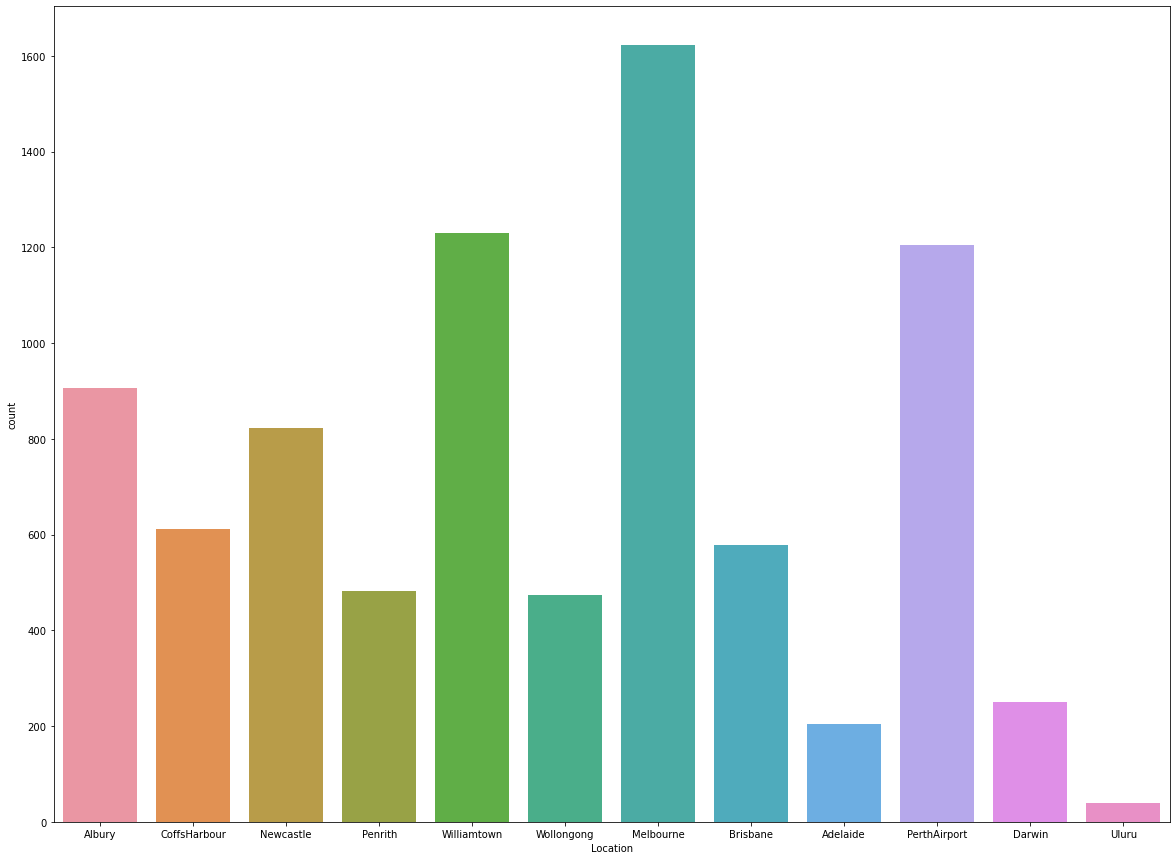

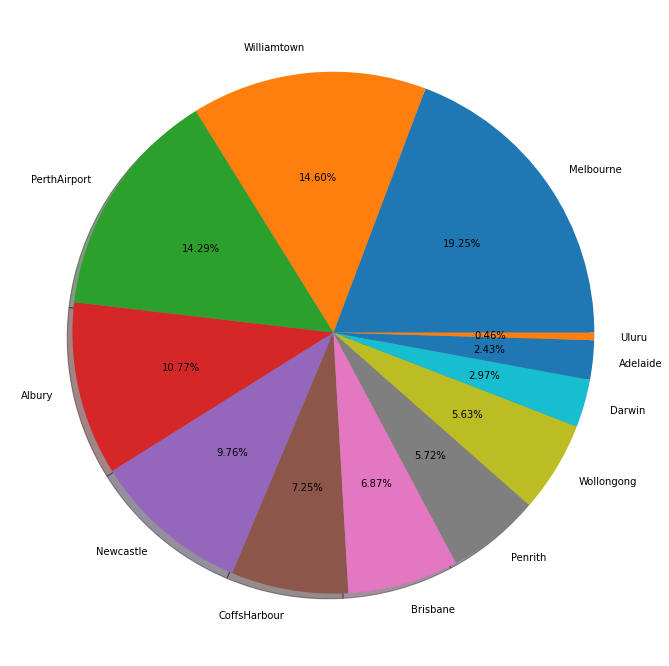



###############################################################################################################################


In [35]:
i=1 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(20,15))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(20,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

-12 location's weather report present in our data
-maximum data of the location is Melbourne and few data of Uluru location stored in our dataframe

column Name: WindGustDir


N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
len= 16


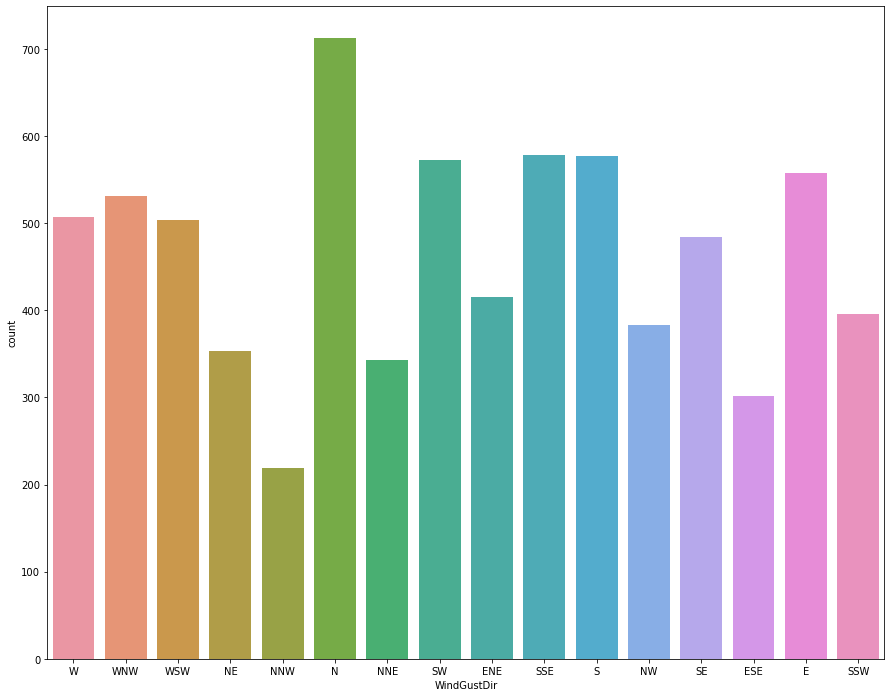

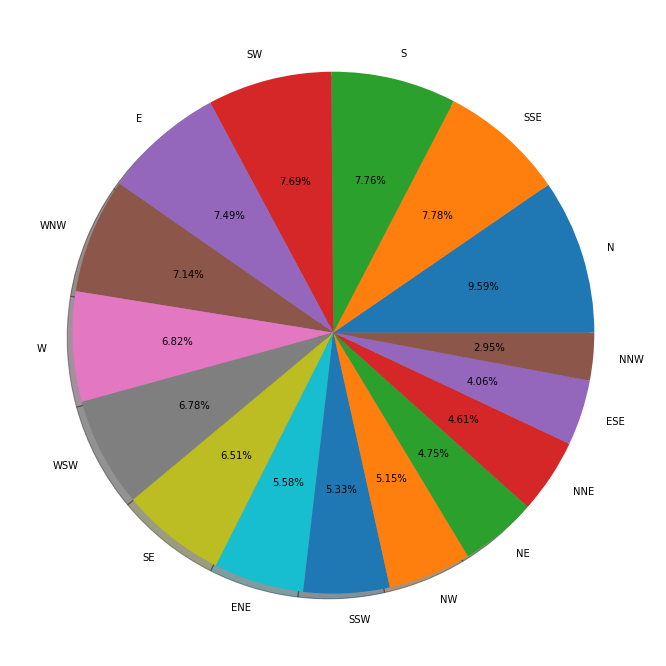



###############################################################################################################################


In [40]:
i=7 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(15,12))
sns.countplot(df[df.columns[i]])
plt.figure(figsize=(15,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')
print("#"*127)

column Name: WindDir9am


N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64
len= 16
#############################################################################################################################


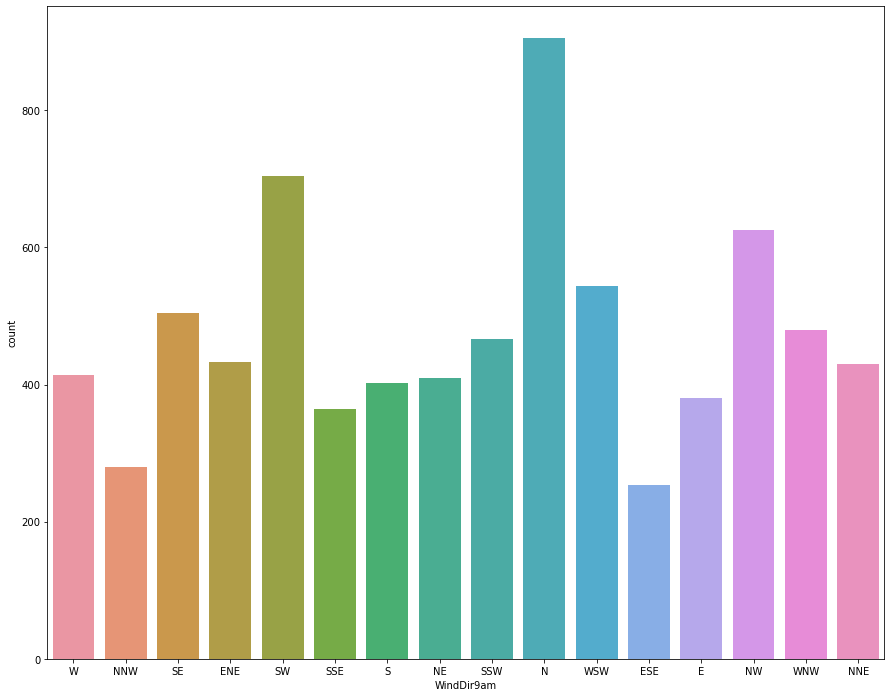

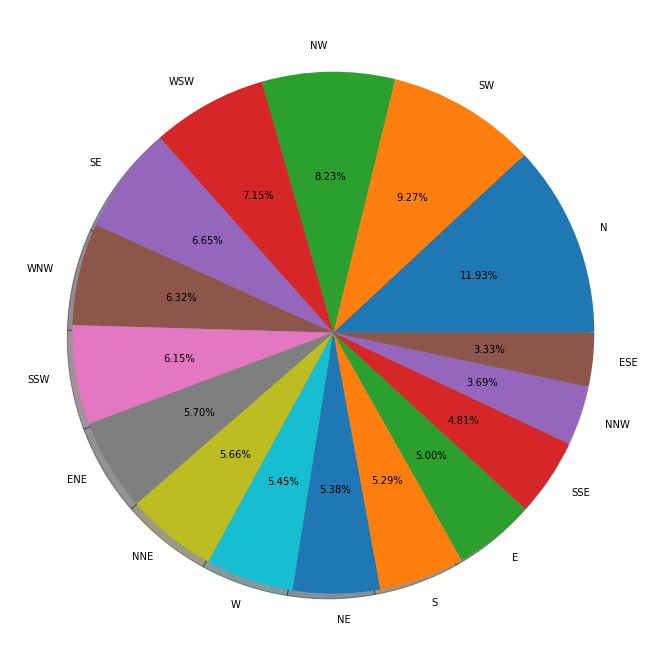

In [44]:

i=9 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(15,12))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(15,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

column Name: WindDir3pm


SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64
len= 16
#############################################################################################################################


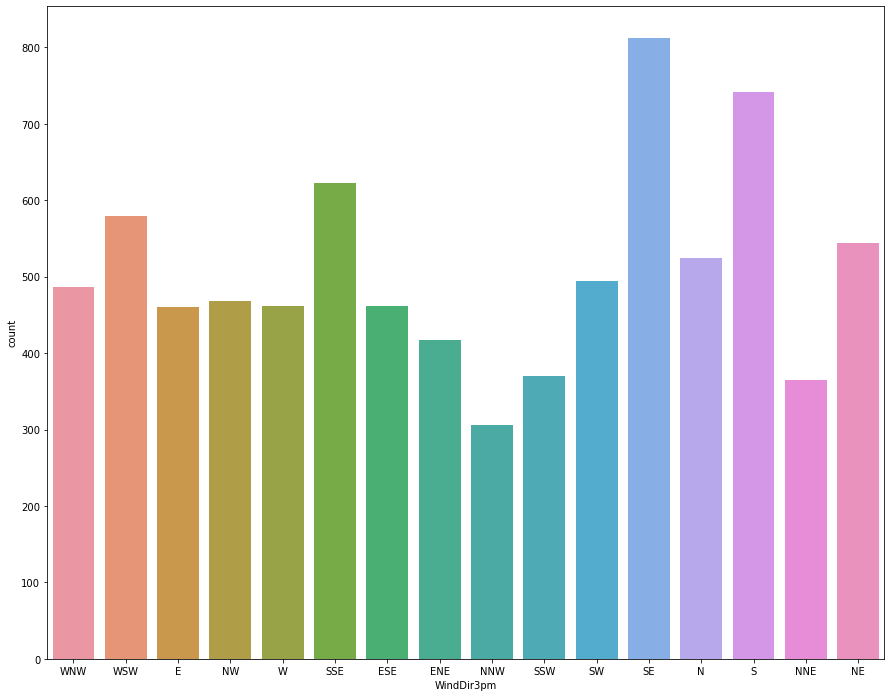

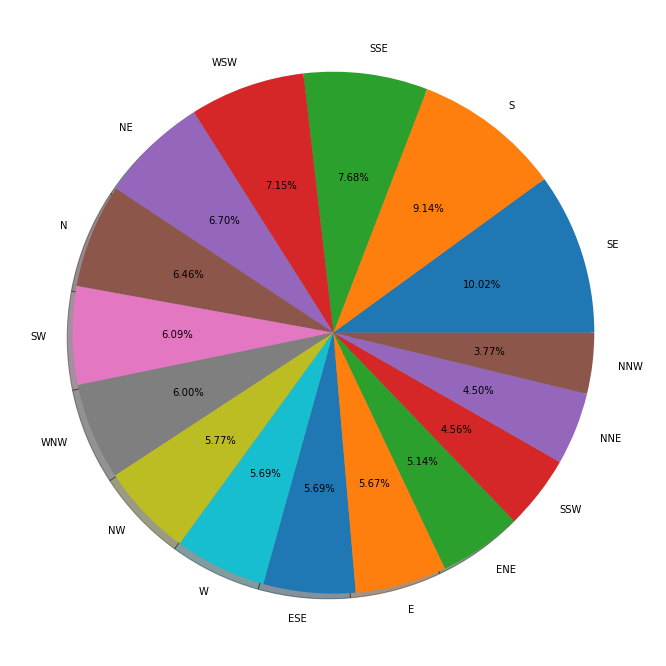

In [50]:
i=10 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(15,12))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(15,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

column Name: RainToday


No     6195
Yes    1990
Name: RainToday, dtype: int64
len= 2
#############################################################################################################################


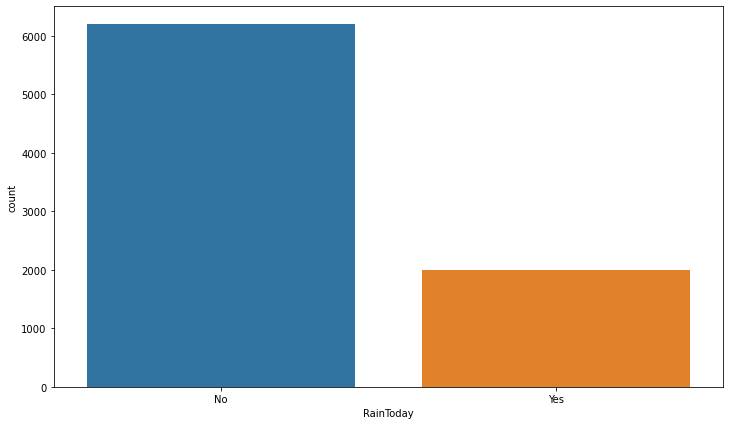

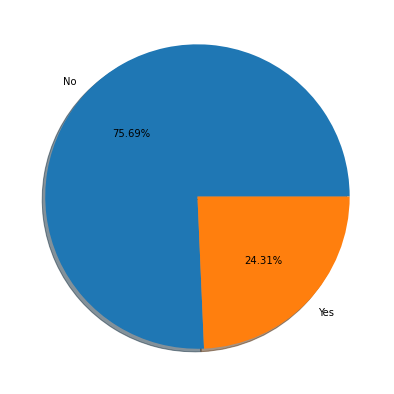

In [57]:
i=21 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(12,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

75% data of RainToday column is yes and 25% is no.

column Name: RainTomorrow


No     6195
Yes    1991
Name: RainTomorrow, dtype: int64
len= 2
#############################################################################################################################


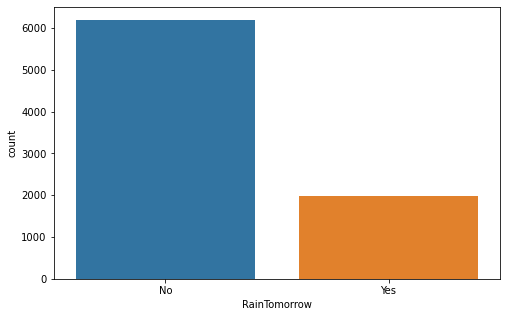

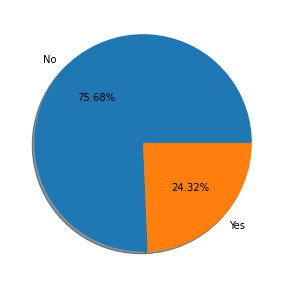

In [63]:
i=22 #using the column index
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(8,5))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(8,5))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

This is our target column.
we can see that 75% data of target column is yes and 25% data is no So the class of our target column is imbalanced.
we will handle it later on.

now checking for numerical columns

In [68]:
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']
[2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25]


column Name: MinTemp


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
len= 285


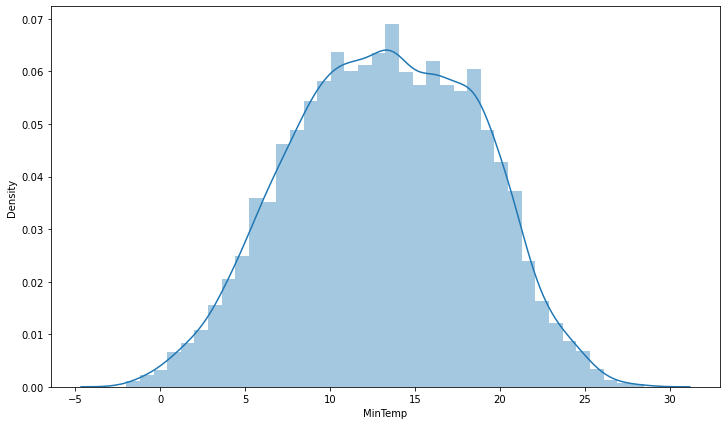



###############################################################################################################################
column Name: MaxTemp


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
len= 331


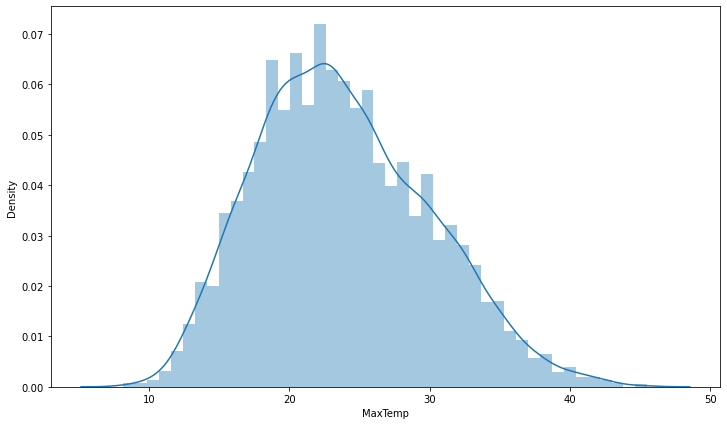



###############################################################################################################################
column Name: Rainfall


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64
len= 250


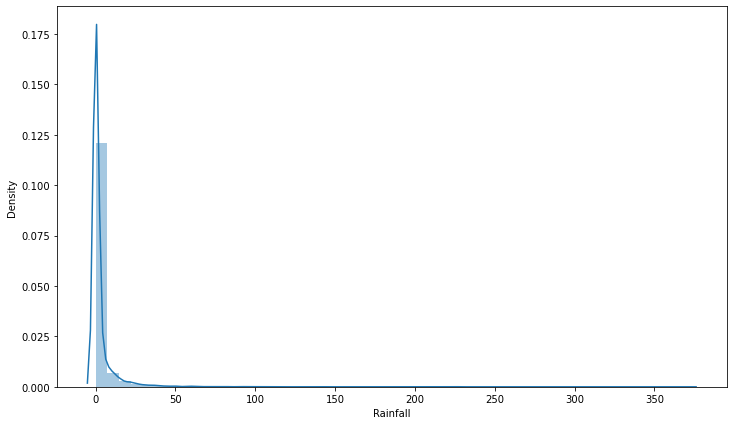



###############################################################################################################################
column Name: Evaporation


4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64
len= 116


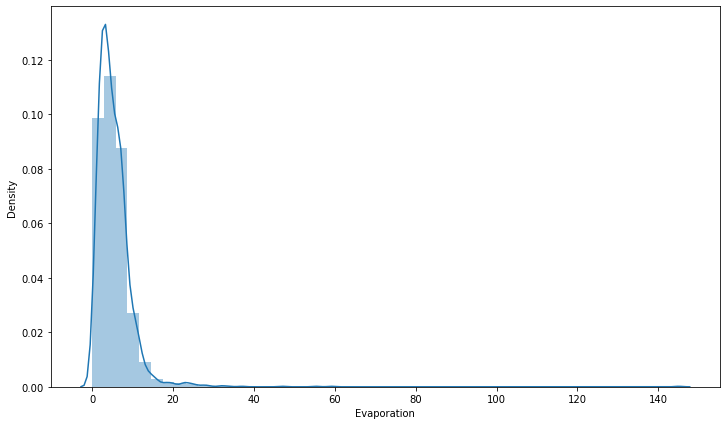



###############################################################################################################################
column Name: Sunshine


0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64
len= 140


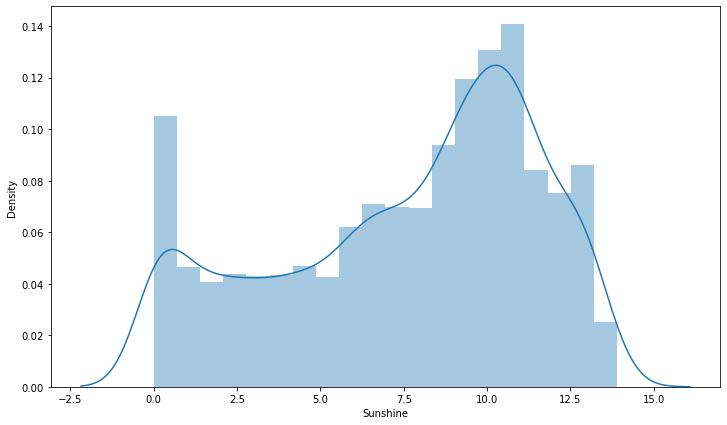



###############################################################################################################################
column Name: WindGustSpeed


39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0     367
28.0     332
43.0     302
48.0     292
26.0     275
50.0     259
46.0     258
24.0     255
52.0     249
44.0     241
22.0     223
54.0     210
20.0     186
56.0     153
57.0     148
19.0     137
61.0     114
59.0     113
63.0      95
17.0      92
65.0      74
67.0      64
72.0      62
15.0      58
13.0      57
74.0      54
70.0      53
69.0      49
76.0      44
78.0      23
80.0      22
11.0      18
85.0      14
81.0      13
91.0      12
93.0       7
89.0       7
83.0       6
9.0        6
98.0       4
94.0       3
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: WindGustSpeed, dtype: int64
len= 52


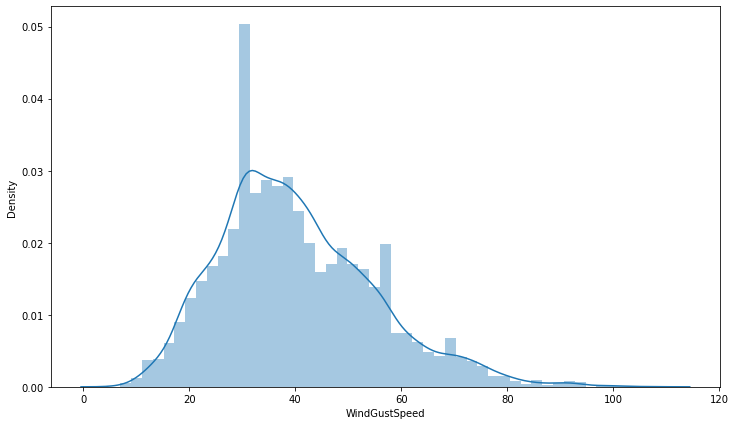



###############################################################################################################################
column Name: WindSpeed9am


9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64
len= 34


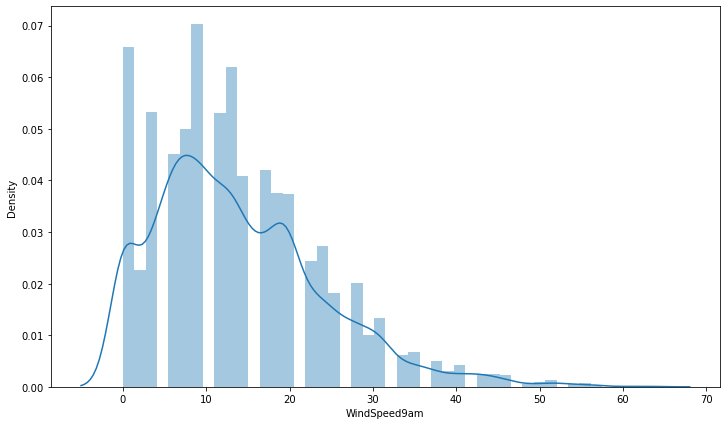



###############################################################################################################################
column Name: WindSpeed3pm


9.0     724
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64
len= 35


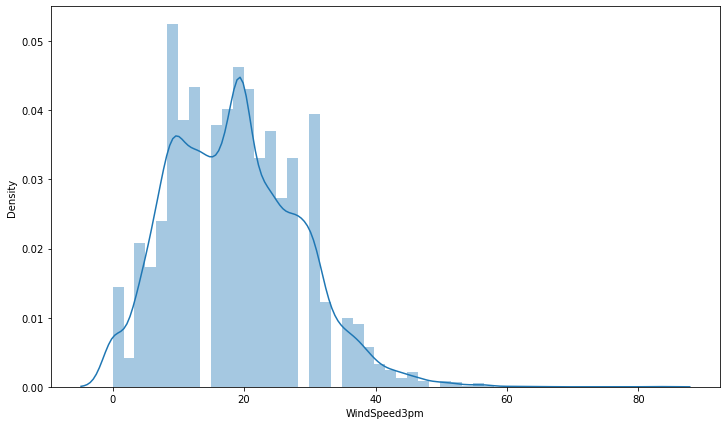



###############################################################################################################################
column Name: Humidity9am


73.0    205
62.0    202
68.0    199
74.0    195
70.0    188
       ... 
17.0      2
14.0      2
11.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64
len= 90


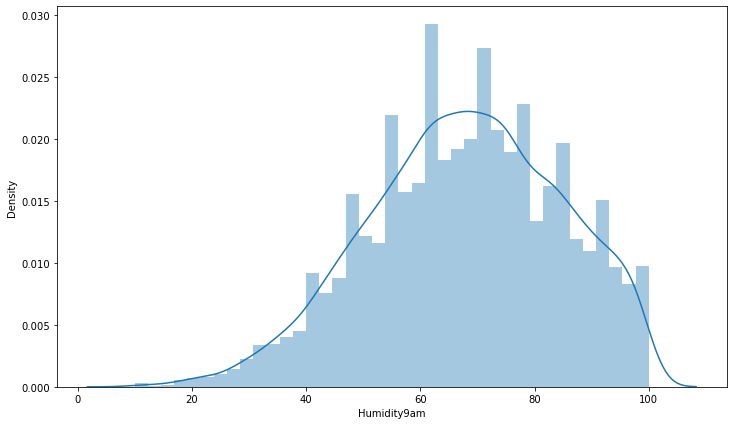



###############################################################################################################################
column Name: Humidity3pm


55.0    195
48.0    194
51.0    194
46.0    193
54.0    193
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: Humidity3pm, Length: 94, dtype: int64
len= 94


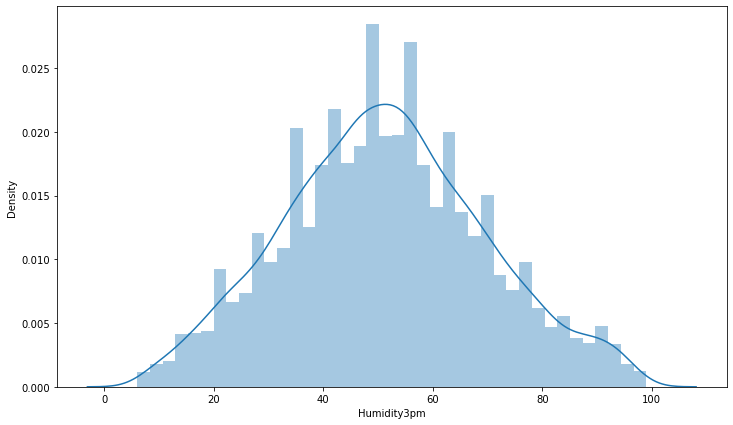



###############################################################################################################################
column Name: Pressure9am


1014.8    58
1019.2    55
1016.1    54
1019.6    53
1020.0    49
          ..
1037.3     1
997.8      1
1036.9     1
1036.3     1
1033.6     1
Name: Pressure9am, Length: 384, dtype: int64
len= 384


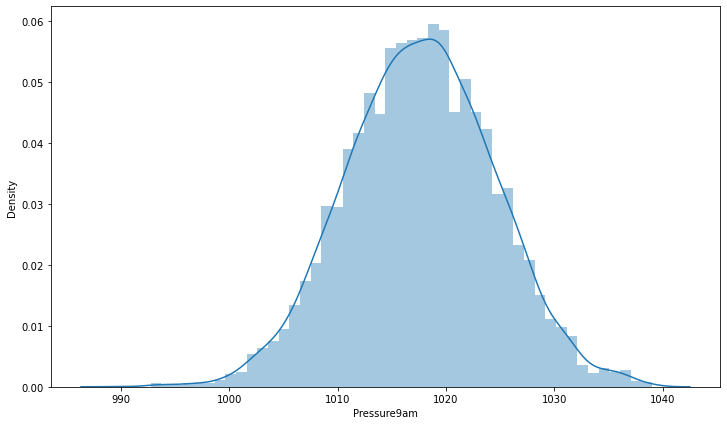



###############################################################################################################################
column Name: Pressure3pm


1017.8    60
1018.0    57
1019.8    53
1017.9    53
1015.5    52
          ..
982.9      1
994.3      1
998.9      1
1030.0     1
1029.5     1
Name: Pressure3pm, Length: 374, dtype: int64
len= 374


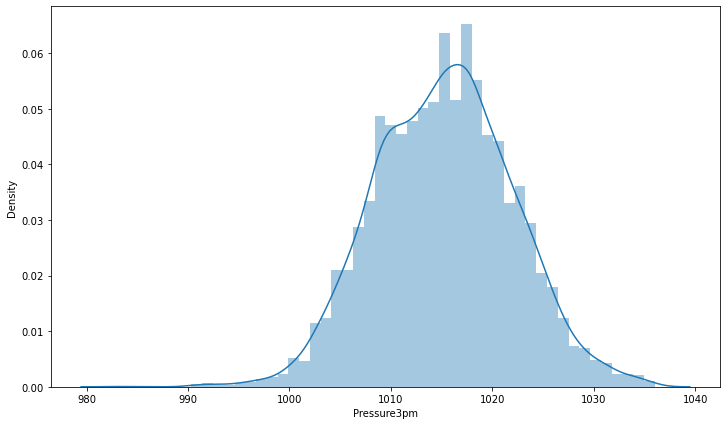



###############################################################################################################################
column Name: Cloud9am


7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64
len= 9


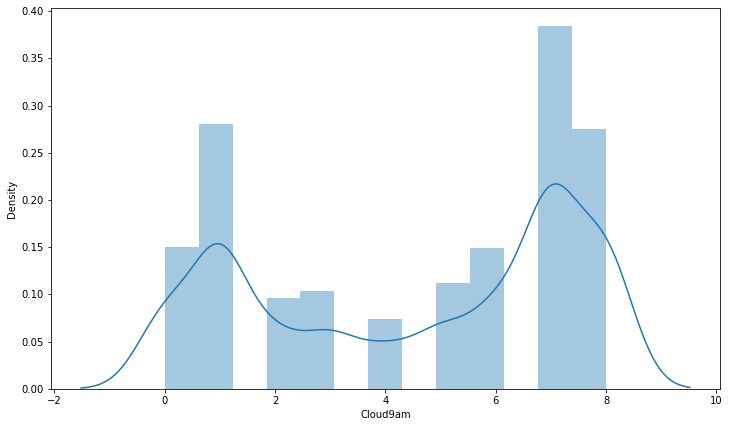



###############################################################################################################################
column Name: Cloud3pm


7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64
len= 9


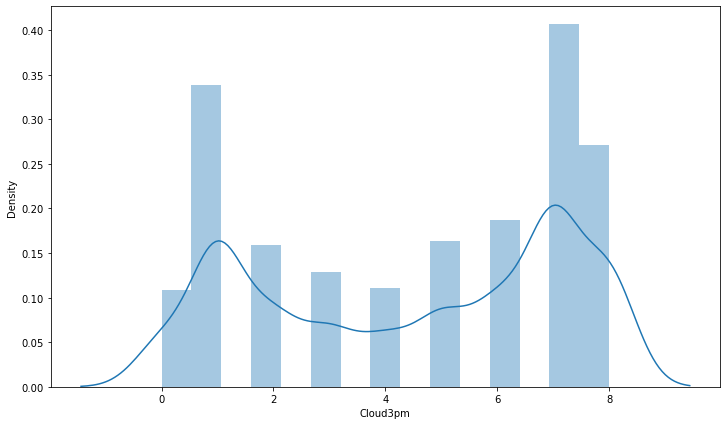



###############################################################################################################################
column Name: Temp9am


14.8    77
18.0    73
18.3    71
17.5    69
20.6    68
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: Temp9am, Length: 304, dtype: int64
len= 304


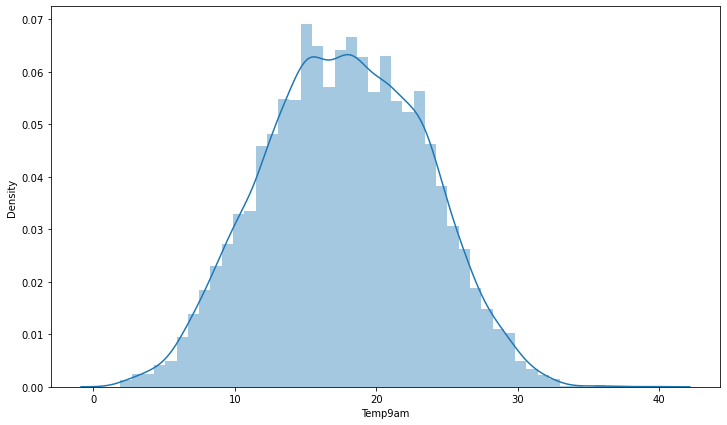



###############################################################################################################################
column Name: Temp3pm


19.2    78
22.5    77
19.0    75
21.7    72
18.5    72
        ..
37.4     1
8.7      1
36.7     1
8.6      1
42.4     1
Name: Temp3pm, Length: 328, dtype: int64
len= 328


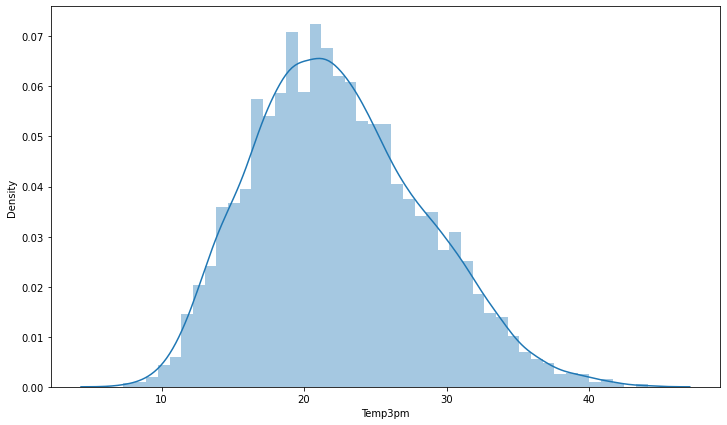



###############################################################################################################################
column Name: Day


21    280
20    280
25    280
24    280
23    280
22    280
10    278
12    278
11    278
9     277
8     277
7     277
13    277
18    277
19    277
14    276
15    276
6     276
17    276
16    276
28    275
1     275
2     275
5     275
4     275
3     275
26    274
27    274
29    256
30    250
31    165
Name: Day, dtype: int64
len= 31


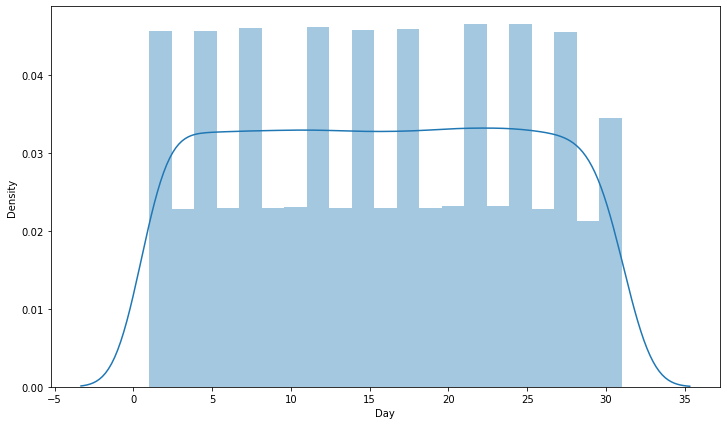



###############################################################################################################################
column Name: Month


6     818
5     801
3     761
1     753
12    741
7     732
8     682
10    655
11    653
2     620
9     609
4     600
Name: Month, dtype: int64
len= 12


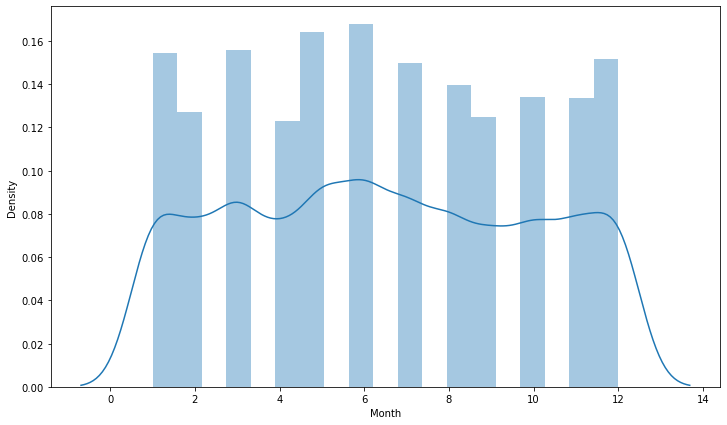



###############################################################################################################################
column Name: Year


2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: Year, dtype: int64
len= 10


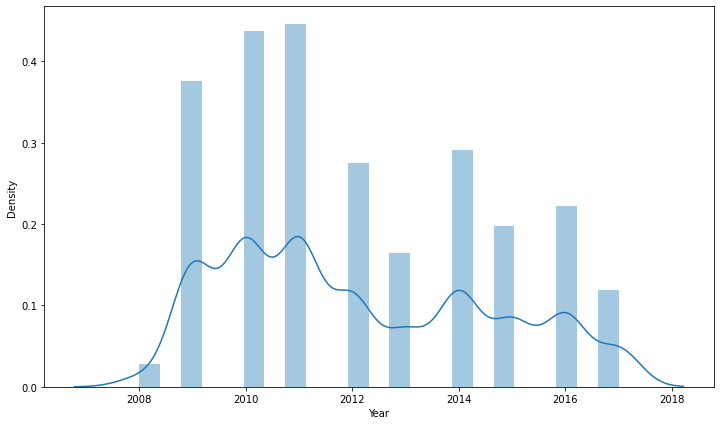



###############################################################################################################################


In [72]:
for i in index_n:
    print("column Name:",df.columns[i])
    print("\n")
    print(df[df.columns[i]].value_counts())
    print("len=",len(df[df.columns[i]].value_counts()))
    plt.figure(figsize=(12,7))
    sns.distplot(df[df.columns[i]])
    plt.show()
    print('\n')
    print("#"*127)

# No skewness Columns(like as a normal distribution curve):
-MinTemp
-Humidity3pm
-Pressure9am
-Pressure3pm
-Cloud9am
-Temp9am
-Temp3pm
-Day
-Month

positive Skewness columns:
-MaxTemp
-Rainfall
-Evaporation
-WindGustSpee
-WindSpeed9am
-WindSpeed3pm
-Year

Negative Skewness Columns:
-Sunshine
-Humidity9am
-Pressure3pm

# Bivariate Analysis

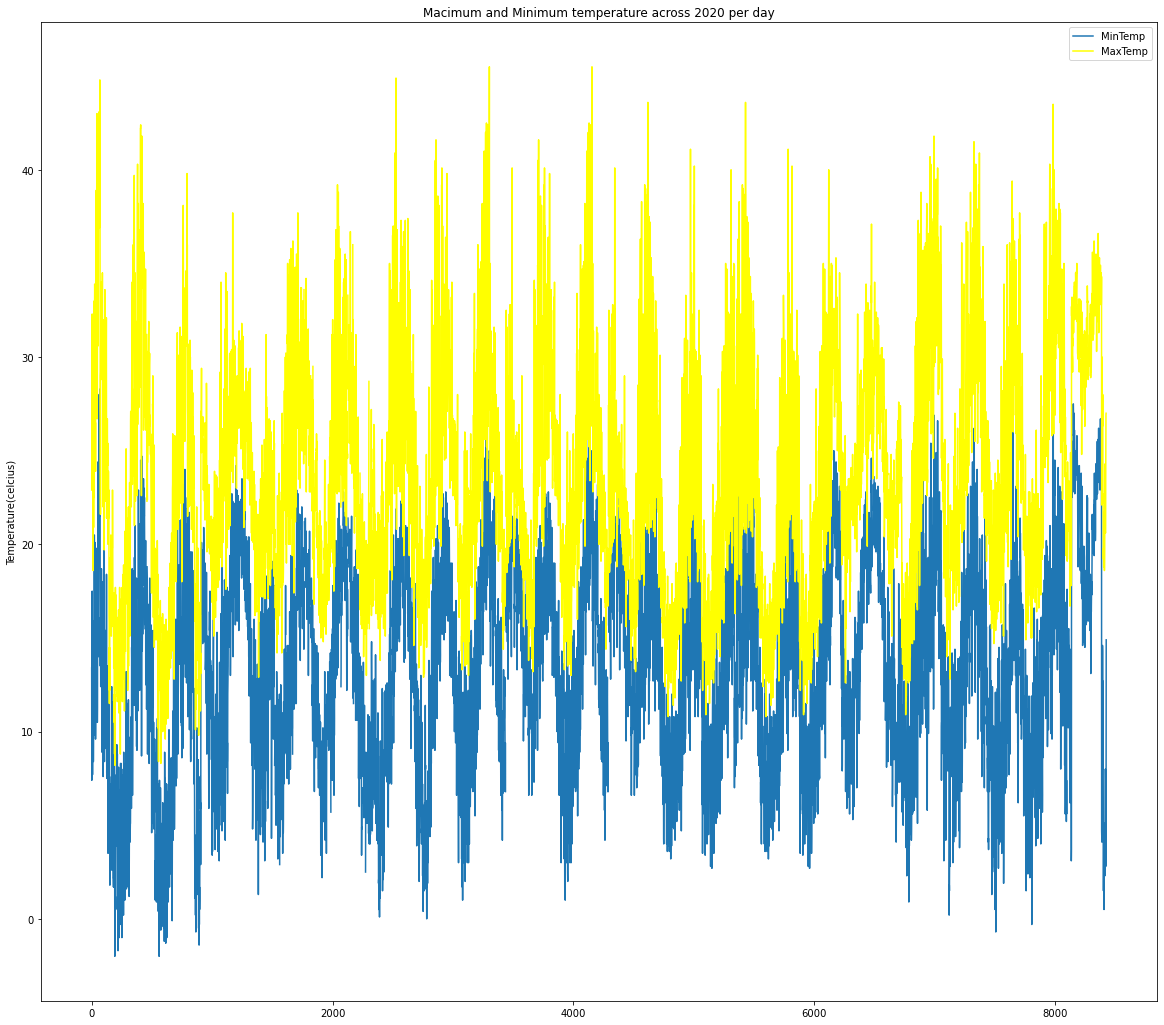

In [74]:
max_temp= df['MaxTemp']
min_temp= df['MinTemp']
min_temp.plot(figsize=(20,18),legend=True)
max_temp.plot(figsize=(20,18),color='yellow',legend=True)
plt.title("Macimum and Minimum temperature across 2020 per day")
plt.ylabel('Temperature(celcius)')
plt.show()

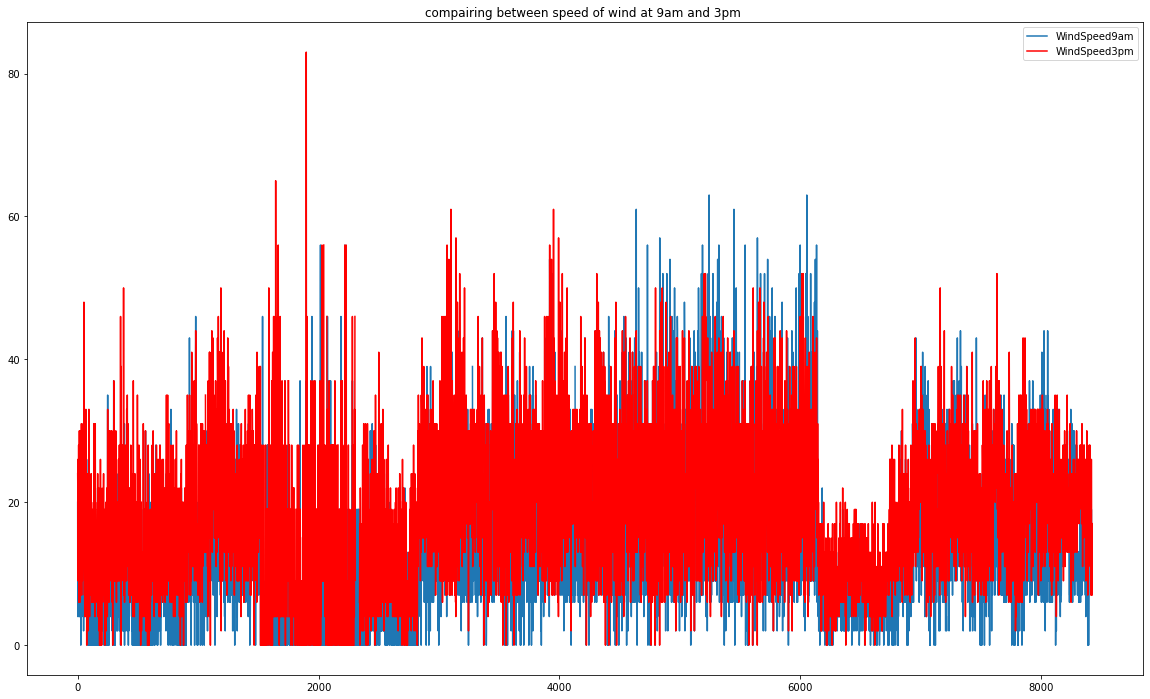

In [80]:
df['WindSpeed9am'].plot(figsize=(20,12), legend=True)
df['WindSpeed3pm'].plot(figsize=(20,12), color='r', legend=True)
plt.title('compairing between speed of wind at 9am and 3pm ')
plt.show()

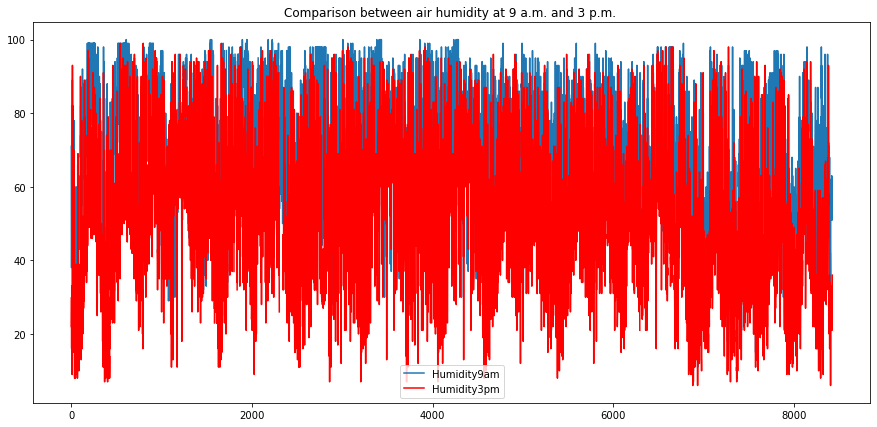

In [88]:
df['Humidity9am'].plot(figsize=(15,7), legend=True)
df['Humidity3pm'].plot(figsize=(15,7), color='r', legend=True)
plt.title('Comparison between air humidity at 9 a.m. and 3 p.m. ')
plt.show()

we can see from the above plot that humidity of maximum days at 9am is higher than humidity at 3pm



In [106]:
index_c

[0, 1, 7, 9, 10, 21, 22]

<AxesSubplot:xlabel='Location', ylabel='count'>

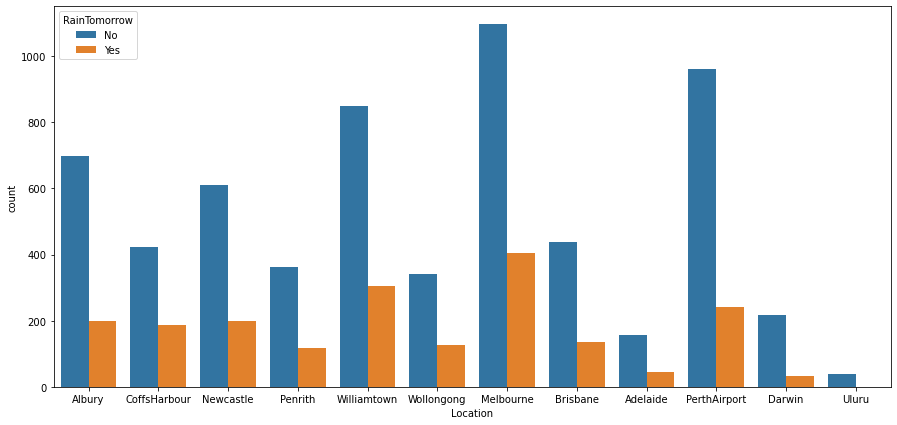

In [107]:
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[1]],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

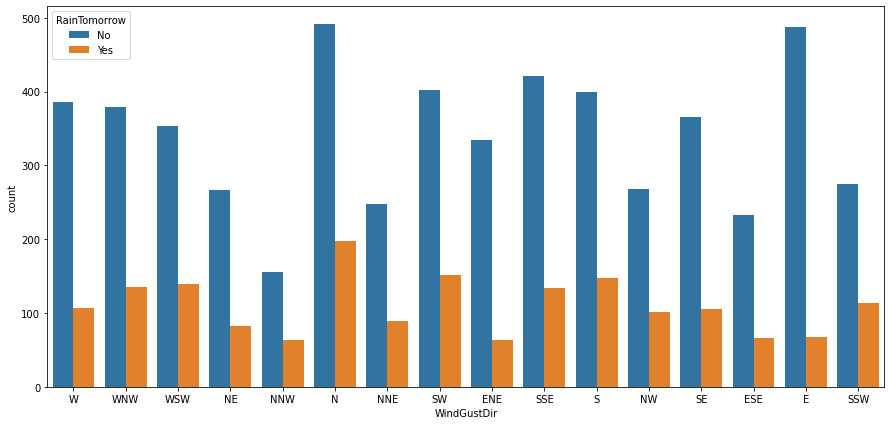

In [108]:
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[7]],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

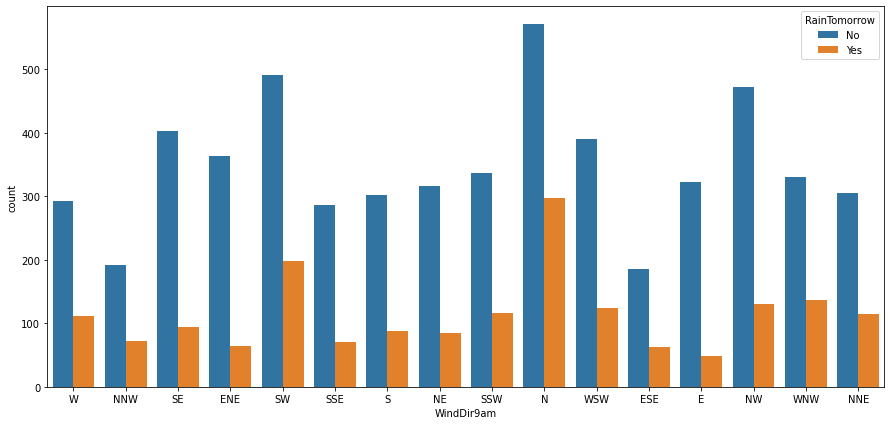

In [109]:
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[9]],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

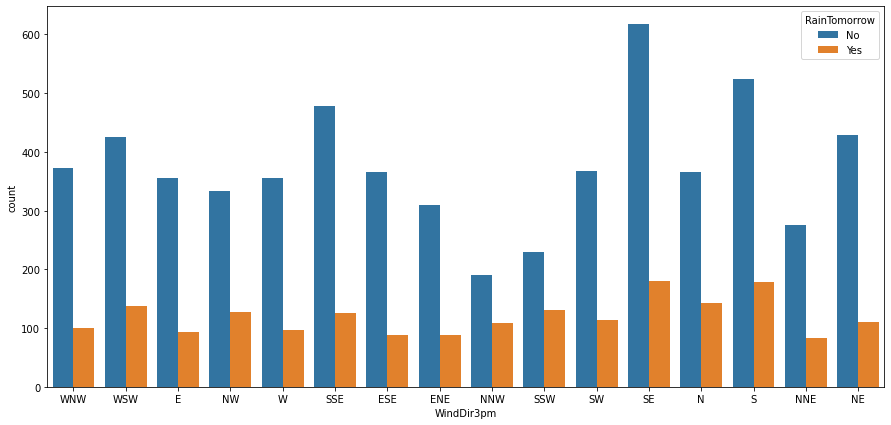

In [110]:
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[10]],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='RainToday', ylabel='count'>

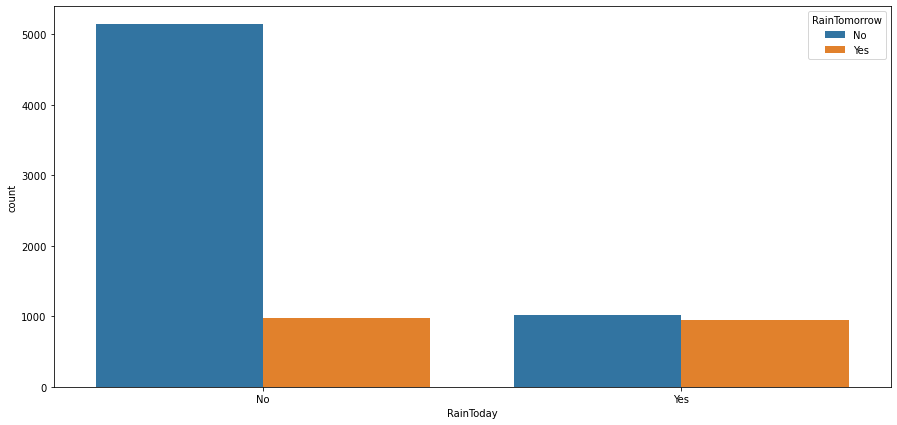

In [112]:
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[21]],hue=df['RainTomorrow'])

# Multivariate Analysis

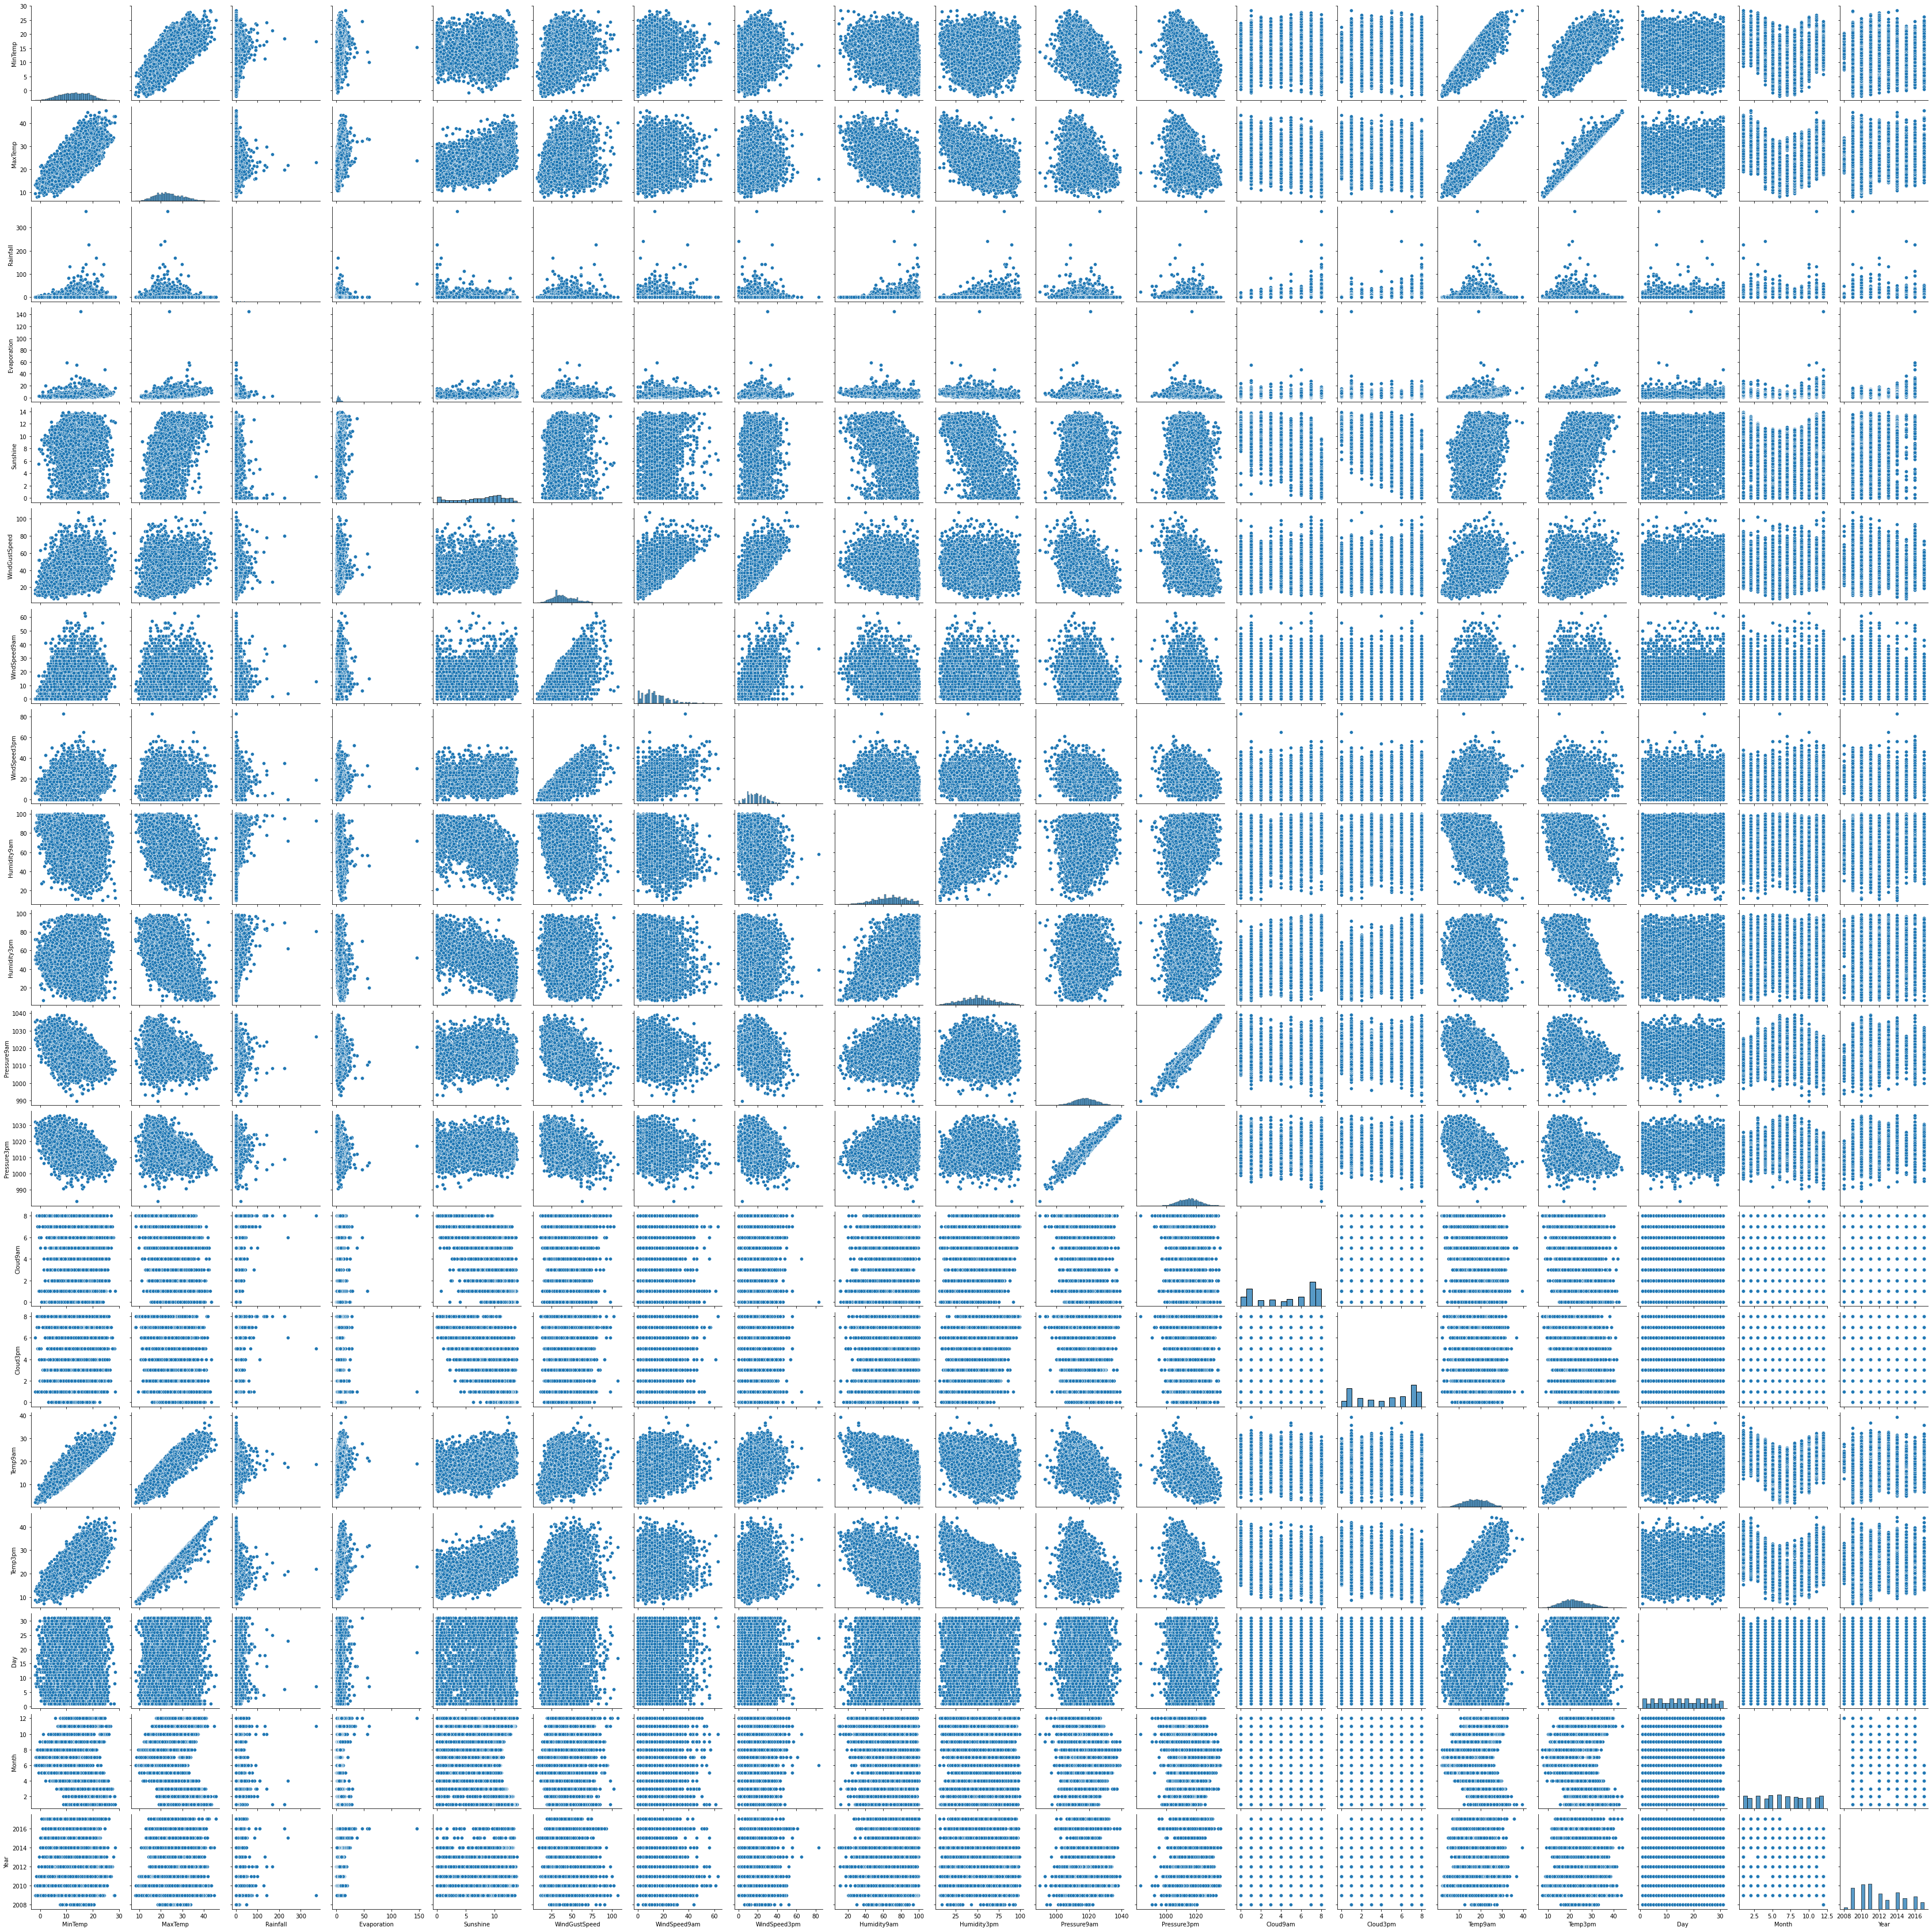

In [113]:
sns.pairplot(df)

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'RainTomorrow'. Here we can observe the relation between the features and label. Most of features are highly correlated with each other. Some of the features have outliers and skewness , will remove them later.

Droping that columns which stored in "drop_columns" list

In [114]:
df=df.drop(drop_columns,axis=1)

In [115]:
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      Albury     13.4     22.9       0.6          NaN       NaN           W   
1      Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2      Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3      Albury      9.2     28.0       0.0          NaN       NaN          NE   
4      Albury     17.5     32.3       1.0          NaN       NaN           W   
...       ...      ...      ...       ...          ...       ...         ...   
8420    Uluru      2.8     23.4       0.0          NaN       NaN           E   
8421    Uluru      3.6     25.3       0.0          NaN       NaN         NNW   
8422    Uluru      5.4     26.9       0.0          NaN       NaN           N   
8423    Uluru      7.8     27.0       0.0          NaN       NaN          SE   
8424    Uluru     14.9      NaN       0.0          NaN       NaN         NaN   

      WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
0              44.0          W        WNW  ...       1007.1       8.0   
1              44.0        NNW        WSW  ...       1007.8       NaN   
2              46.0          W        WSW  ...       1008.7       NaN   
3              24.0         SE          E  ...       1012.8       NaN   
4              41.0        ENE         NW  ...       1006.0       7.0   
...             ...        ...        ...  ...          ...       ...   
8420           31.0         SE        ENE  ...       1020.3       NaN   
8421           22.0         SE          N  ...       1019.1       NaN   
8422           37.0         SE        WNW  ...       1016.8       NaN   
8423           28.0        SSE          N  ...       1016.5       3.0   
8424            NaN        ESE        ESE  ...       1017.9       8.0   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0          NaN     16.9     21.8         No            No    1     12  2008  
1          NaN     17.2     24.3         No            No    2     12  2008  
2          2.0     21.0     23.2         No            No    3     12  2008  
3          NaN     18.1     26.5         No            No    4     12  2008  
4          8.0     17.8     29.7         No            No    5     12  2008  
...        ...      ...      ...        ...           ...  ...    ...   ...  
8420       NaN     10.1     22.4         No            No   21      6  2017  
8421       NaN     10.9     24.5         No            No   22      6  2017  
8422       NaN     12.5     26.1         No            No   23      6  2017  
8423       2.0     15.1     26.0         No            No   24      6  2017  
8424       8.0     15.0     20.9         No           NaN   25      6  2017  

[8425 rows x 25 columns]

In [116]:
df.describe().T

count         mean        std     min      25%     50%  \
MinTemp        8350.0    13.193305   5.403596    -2.0     9.20    13.3   
MaxTemp        8365.0    23.859976   6.136408     8.2    19.30    23.3   
Rainfall       8185.0     2.805913  10.459379     0.0     0.00     0.0   
Evaporation    4913.0     5.389395   5.044484     0.0     2.60     4.6   
Sunshine       4431.0     7.632205   3.896235     0.0     4.75     8.7   
WindGustSpeed  7434.0    40.174469  14.665721     7.0    30.00    39.0   
WindSpeed9am   8349.0    13.847646  10.174579     0.0     6.00    13.0   
WindSpeed3pm   8318.0    18.533662   9.766986     0.0    11.00    19.0   
Humidity9am    8366.0    67.822496  16.833283    10.0    56.00    68.0   
Humidity3pm    8323.0    51.249790  18.423774     6.0    39.00    51.0   
Pressure9am    7116.0  1017.640233   6.828699   989.8  1013.00  1017.7   
Pressure3pm    7113.0  1015.236075   6.766681   982.9  1010.40  1015.3   
Cloud9am       6004.0     4.566622   2.877658     0.0     1.00     5.0   
Cloud3pm       5970.0     4.503183   2.731659     0.0     2.00     5.0   
Temp9am        8369.0    17.762015   5.627035     1.9    13.80    17.8   
Temp3pm        8329.0    22.442934   5.980020     7.3    18.00    21.9   
Day            8425.0    15.741958   8.787354     1.0     8.00    16.0   
Month          8425.0     6.442136   3.437994     1.0     3.00     6.0   
Year           8425.0  2012.102433   2.473137  2008.0  2010.00  2011.0   

                  75%     max  
MinTemp          17.4    28.5  
MaxTemp          28.0    45.5  
Rainfall          1.0   371.0  
Evaporation       7.0   145.0  
Sunshine         10.7    13.9  
WindGustSpeed    50.0   107.0  
WindSpeed9am     20.0    63.0  
WindSpeed3pm     24.0    83.0  
Humidity9am      80.0   100.0  
Humidity3pm      63.0    99.0  
Pressure9am    1022.3  1039.0  
Pressure3pm    1019.8  1036.0  
Cloud9am          7.0     8.0  
Cloud3pm          7.0     8.0  
Temp9am          21.9    39.4  
Temp3pm          26.4    44.1  
Day              23.0    31.0  
Month             9.0    12.0  
Year           2014.0  2017.0

# Checking Correlation

In [119]:
df.corr(
)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.720955  0.091642     0.348643  0.081365   
MaxTemp        0.720955  1.000000 -0.088906     0.424728  0.523909   
Rainfall       0.091642 -0.088906  1.000000     0.043463 -0.209654   
Evaporation    0.348643  0.424728  0.043463     1.000000  0.340893   
Sunshine       0.081365  0.523909 -0.209654     0.340893  1.000000   
WindGustSpeed  0.241317  0.146113  0.104999     0.214069 -0.018455   
WindSpeed9am   0.137263  0.013425  0.051349     0.176701 -0.025112   
WindSpeed3pm   0.180091  0.088797  0.025185     0.142421  0.045031   
Humidity9am   -0.130906 -0.392496  0.231702    -0.286869 -0.512349   
Humidity3pm    0.079569 -0.424217  0.238730    -0.221244 -0.630536   
Pressure9am   -0.465478 -0.347285 -0.080412    -0.218171  0.028666   
Pressure3pm   -0.458665 -0.430074 -0.037270    -0.233401 -0.047098   
Cloud9am       0.111213 -0.307700  0.195157    -0.084288 -0.705577   
Cloud3pm       0.046889 -0.301675  0.159250    -0.152637 -0.723957   
Temp9am        0.888342  0.869503 -0.007191     0.405467  0.348708   
Temp3pm        0.689652  0.978665 -0.092263     0.414156  0.546057   
Day            0.009494  0.015668 -0.013953     0.017785  0.006420   
Month         -0.247142 -0.163891 -0.012522     0.005729 -0.009156   
Year           0.044324  0.120234  0.006530     0.256852  0.144615   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.241317      0.137263      0.180091    -0.130906   
MaxTemp             0.146113      0.013425      0.088797    -0.392496   
Rainfall            0.104999      0.051349      0.025185     0.231702   
Evaporation         0.214069      0.176701      0.142421    -0.286869   
Sunshine           -0.018455     -0.025112      0.045031    -0.512349   
WindGustSpeed       1.000000      0.656079      0.711403    -0.286045   
WindSpeed9am        0.656079      1.000000      0.566322    -0.358981   
WindSpeed3pm        0.711403      0.566322      1.000000    -0.252488   
Humidity9am        -0.286045     -0.358981     -0.252488     1.000000   
Humidity3pm        -0.097380     -0.111595     -0.091248     0.636255   
Pressure9am        -0.430736     -0.197189     -0.291271     0.154699   
Pressure3pm        -0.394745     -0.156517     -0.240378     0.188463   
Cloud9am            0.030124     -0.000607      0.005807     0.472126   
Cloud3pm            0.104157      0.068930      0.003894     0.352736   
Temp9am             0.211477      0.109936      0.185329    -0.378389   
Temp3pm             0.106872     -0.002619      0.066201    -0.383788   
Day                -0.003062     -0.003081     -0.009017     0.003814   
Month               0.055158      0.038668      0.049760    -0.116017   
Year               -0.045032     -0.089133     -0.051882     0.100085   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.079569    -0.465478    -0.458665  0.111213  0.046889   
MaxTemp          -0.424217    -0.347285    -0.430074 -0.307700 -0.301675   
Rainfall          0.238730    -0.080412    -0.037270  0.195157  0.159250   
Evaporation      -0.221244    -0.218171    -0.233401 -0.084288 -0.152637   
Sunshine         -0.630536     0.028666    -0.047098 -0.705577 -0.723957   
WindGustSpeed    -0.097380    -0.430736    -0.394745  0.030124  0.104157   
WindSpeed9am     -0.111595    -0.197189    -0.156517 -0.000607  0.068930   
WindSpeed3pm     -0.091248    -0.291271    -0.240378  0.005807  0.003894   
Humidity9am       0.636255     0.154699     0.188463  0.472126  0.352736   
Humidity3pm       1.000000     0.001763     0.076002  0.509797  0.520221   
Pressure9am       0.001763     1.000000     0.961922 -0.091391 -0.104535   
Pressure3pm       0.076002     0.961922     1.000000 -0.015692 -0.035986   
Cloud9am          0.509797    -0.091391    -0.015692  1.000000  0.619202   
Cloud3pm          0.520221    -0.104535    -0.035986  0.619202  1.000000   
Temp9am       

checking the correlation by heatmap

<AxesSubplot:>

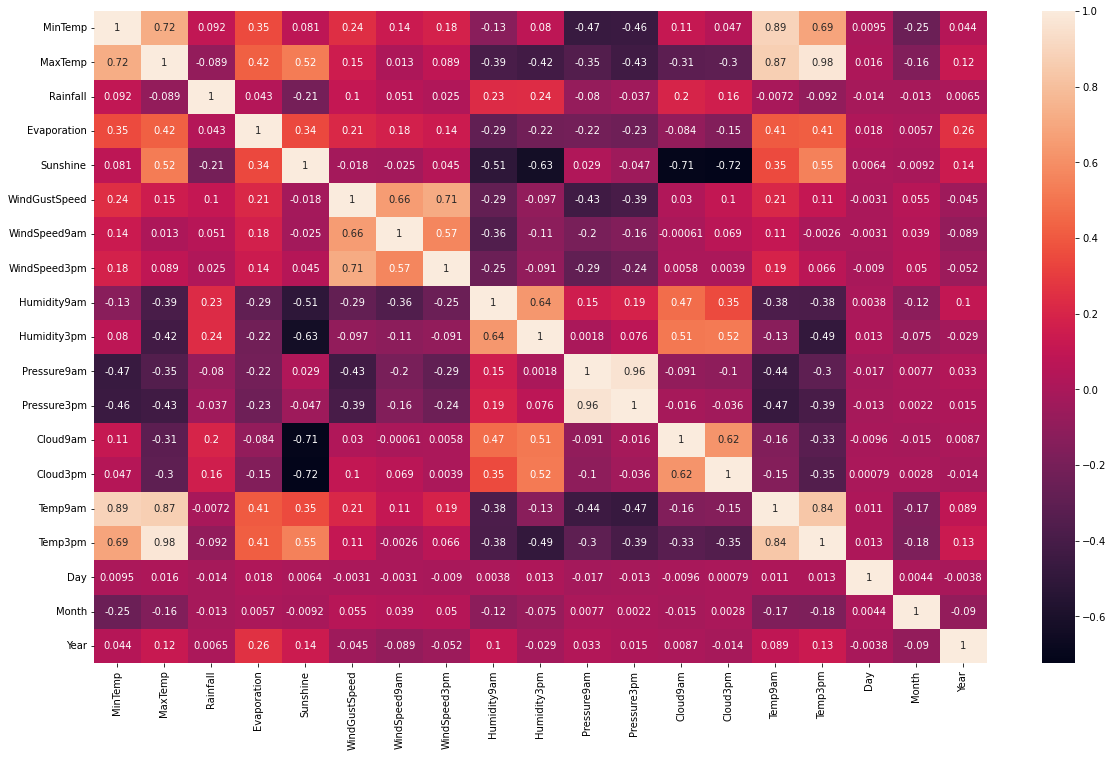

In [124]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)


# Checking Skewness

In [125]:
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
Day               0.004260
Month             0.039388
Year              0.418663
dtype: float64

Handling Missing Value


In [126]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

In [128]:
#total dataframe divided into two new dataframe based on target columns data
yes_rain = df[df['RainTomorrow']=='Yes']
no_rain = df[df['RainTomorrow']=='No']

In [129]:
yes_rain

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
8      Albury      9.7     31.9       0.0          NaN       NaN         NNW   
10     Albury     13.4     30.4       0.0          NaN       NaN           N   
11     Albury     15.9     21.7       2.2          NaN       NaN         NNE   
12     Albury     15.9     18.6      15.6          NaN       NaN           W   
16     Albury     14.1     20.9       0.0          NaN       NaN         ENE   
...       ...      ...      ...       ...          ...       ...         ...   
8371   Darwin     25.2     34.1       0.0          7.6      10.2          NW   
8372   Darwin     22.9     32.8       5.8          7.4       4.4           N   
8377   Darwin     25.6     34.1       1.0          7.6      11.3           N   
8380   Darwin     25.8     32.9       0.0          7.6       6.7           N   
8382   Darwin     26.2     33.3       0.0          6.0       5.9           N   

      WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
8              80.0         SE         NW  ...       1003.6       NaN   
10             30.0        SSE        ESE  ...       1008.7       NaN   
11             31.0         NE        ENE  ...       1004.2       8.0   
12             61.0        NNW        NNW  ...        993.0       8.0   
16             22.0        SSW          E  ...       1010.4       8.0   
...             ...        ...        ...  ...          ...       ...   
8371           37.0        WSW         NW  ...       1006.5       5.0   
8372           57.0          N        NNW  ...       1007.4       8.0   
8377           35.0        NNE        NNW  ...       1006.9       4.0   
8380           31.0          N        NNW  ...       1006.7       5.0   
8382           54.0        ENE          E  ...       1006.8       4.0   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
8          NaN     18.3     30.2         No           Yes    9     12  2008  
10         NaN     20.4     28.8         No           Yes   11     12  2008  
11         8.0     15.9     17.0        Yes           Yes   12     12  2008  
12         8.0     17.4     15.8        Yes           Yes   13     12  2008  
16         1.0     17.2     18.1         No           Yes   17     12  2008  
...        ...      ...      ...        ...           ...  ...    ...   ...  
8371       3.0     29.9     32.1         No           Yes   27     10  2012  
8372       5.0     23.4     32.0        Yes           Yes   28     10  2012  
8377       3.0     29.2     33.1         No           Yes    2     11  2012  
8380       2.0     30.7     32.0         No           Yes    5     11  2012  
8382       8.0     30.2     25.2         No           Yes    7     11  2012  

[1991 rows x 25 columns]

In [130]:
no_rain

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      Albury     13.4     22.9       0.6          NaN       NaN           W   
1      Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2      Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3      Albury      9.2     28.0       0.0          NaN       NaN          NE   
4      Albury     17.5     32.3       1.0          NaN       NaN           W   
...       ...      ...      ...       ...          ...       ...         ...   
8419    Uluru      3.5     21.8       0.0          NaN       NaN           E   
8420    Uluru      2.8     23.4       0.0          NaN       NaN           E   
8421    Uluru      3.6     25.3       0.0          NaN       NaN         NNW   
8422    Uluru      5.4     26.9       0.0          NaN       NaN           N   
8423    Uluru      7.8     27.0       0.0          NaN       NaN          SE   

      WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
0              44.0          W        WNW  ...       1007.1       8.0   
1              44.0        NNW        WSW  ...       1007.8       NaN   
2              46.0          W        WSW  ...       1008.7       NaN   
3              24.0         SE          E  ...       1012.8       NaN   
4              41.0        ENE         NW  ...       1006.0       7.0   
...             ...        ...        ...  ...          ...       ...   
8419           31.0        ESE          E  ...       1021.2       NaN   
8420           31.0         SE        ENE  ...       1020.3       NaN   
8421           22.0         SE          N  ...       1019.1       NaN   
8422           37.0         SE        WNW  ...       1016.8       NaN   
8423           28.0        SSE          N  ...       1016.5       3.0   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0          NaN     16.9     21.8         No            No    1     12  2008  
1          NaN     17.2     24.3         No            No    2     12  2008  
2          2.0     21.0     23.2         No            No    3     12  2008  
3          NaN     18.1     26.5         No            No    4     12  2008  
4          8.0     17.8     29.7         No            No    5     12  2008  
...        ...      ...      ...        ...           ...  ...    ...   ...  
8419       NaN      9.4     20.9         No            No   20      6  2017  
8420       NaN     10.1     22.4         No            No   21      6  2017  
8421       NaN     10.9     24.5         No            No   22      6  2017  
8422       NaN     12.5     26.1         No            No   23      6  2017  
8423       2.0     15.1     26.0         No            No   24      6  2017  

[6195 rows x 25 columns]

In [131]:
print(yes_rain.shape) 
print(no_rain.shape)

(1991, 25)
(6195, 25)


In [136]:
yes_rain['MinTemp'].fillna(yes_rain['MinTemp'].mode()[0],inplace=True)
no_rain['MinTemp'].fillna(no_rain['MinTemp'].mode()[0],inplace=True)

yes_rain['MaxTemp'].fillna(yes_rain['MaxTemp'].mode()[0],inplace=True)
no_rain['MaxTemp'].fillna(no_rain['MaxTemp'].mode()[0],inplace=True)

yes_rain['Temp9am'].fillna(yes_rain['Temp9am'].mode()[0],inplace=True)
no_rain['Temp9am'].fillna(no_rain['Temp9am'].mode()[0],inplace=True)

yes_rain['Temp3pm'].fillna(yes_rain['Temp3pm'].mode()[0],inplace=True)
no_rain['Temp3pm'].fillna(no_rain['Temp3pm'].mode()[0],inplace=True)

yes_rain['Humidity3pm'].fillna(yes_rain['Humidity3pm'].mode()[0],inplace=True)
no_rain['Humidity3pm'].fillna(no_rain['Humidity3pm'].mode()[0],inplace=True)

yes_rain['Humidity9am'].fillna(yes_rain['Humidity9am'].mode()[0],inplace=True)
no_rain['Humidity9am'].fillna(no_rain['Humidity9am'].mode()[0],inplace=True)

yes_rain['Sunshine'].fillna(yes_rain['Sunshine'].median(),inplace=True)
no_rain['Sunshine'].fillna(no_rain['Sunshine'].median(),inplace=True)

yes_rain['Evaporation'].fillna(yes_rain['Evaporation'].median(),inplace=True)
no_rain['Evaporation'].fillna(no_rain['Evaporation'].median(),inplace=True)

yes_rain['Cloud3pm'].fillna(yes_rain['Cloud3pm'].median(),inplace=True)
no_rain['Cloud3pm'].fillna(no_rain['Cloud3pm'].median(),inplace=True)

yes_rain['Cloud9am'].fillna(yes_rain['Cloud9am'].median(),inplace=True)
no_rain['Cloud9am'].fillna(no_rain['Cloud9am'].median(),inplace=True)
yes_rain['Pressure3pm'].fillna(yes_rain['Pressure3pm'].median(),inplace=True)
no_rain['Pressure3pm'].fillna(no_rain['Pressure3pm'].median(),inplace=True)

yes_rain['Pressure9am'].fillna(yes_rain['Pressure9am'].median(),inplace=True)
no_rain['Pressure9am'].fillna(no_rain['Pressure9am'].median(),inplace=True)

yes_rain['WindGustDir'].fillna(yes_rain['WindGustDir'].mode()[0],inplace=True)
no_rain['WindGustDir'].fillna(no_rain['WindGustDir'].mode()[0],inplace=True)

yes_rain['WindGustSpeed'].fillna(yes_rain['WindGustSpeed'].median(),inplace=True)
no_rain['WindGustSpeed'].fillna(no_rain['WindGustSpeed'].median(),inplace=True)

yes_rain['WindDir9am'].fillna(yes_rain['WindDir9am'].mode()[0],inplace=True)
no_rain['WindDir9am'].fillna(no_rain['WindDir9am'].mode()[0],inplace=True)

yes_rain['WindDir3pm'].fillna(yes_rain['WindDir3pm'].mode()[0],inplace=True)
no_rain['WindDir3pm'].fillna(no_rain['WindDir3pm'].mode()[0],inplace=True)

yes_rain['WindSpeed3pm'].fillna(yes_rain['WindSpeed3pm'].median(),inplace=True)
no_rain['WindSpeed3pm'].fillna(no_rain['WindSpeed3pm'].median(),inplace=True)

yes_rain['WindSpeed9am'].fillna(yes_rain['WindSpeed9am'].median(),inplace=True)
no_rain['WindSpeed9am'].fillna(no_rain['WindSpeed9am'].median(),inplace=True)

yes_rain['Rainfall'].fillna(yes_rain['Rainfall'].median(),inplace=True)
no_rain['Rainfall'].fillna(no_rain['Rainfall'].median(),inplace=True)

yes_rain['RainToday'].fillna(yes_rain['RainToday'].mode(),inplace=True)
no_rain['RainToday'].fillna(no_rain['RainToday'].mode(),inplace=True)

In [138]:
#joining the Dattaframe
df= yes_rain.append(no_rain, ignore_index=True)

In [139]:
df.sample(20)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6903      Adelaide      9.5     21.5       0.0          4.8       9.6   
6658      Brisbane     20.1     26.0      22.2          4.0       0.0   
1           Albury     13.4     30.4       0.0          3.8       4.2   
7579  PerthAirport     16.8     34.3       0.0          7.6      10.5   
171         Albury     21.5     28.9       5.0          3.8       4.2   
3156     Newcastle      6.9     19.2       0.0          4.8       9.6   
464      Newcastle     10.2     18.4       1.0          3.8       4.2   
4156   Williamtown     14.9     32.6       0.0         11.6       8.5   
3546     Newcastle     18.5     20.0       1.2          4.8       9.6   
7007  PerthAirport     18.3     35.2       0.0         13.2      13.0   
5202    Wollongong     17.5     29.0       0.0          4.8       9.6   
5150    Wollongong     19.9     24.9       0.0          4.8       9.6   
4260   Williamtown     10.2     20.7       0.0          6.0       9.6   
3075  CoffsHarbour     12.4     19.6       0.0          4.8       4.1   
3758       Penrith      4.8     15.5       0.0          4.8       9.6   
4324   Williamtown      6.0     20.9       0.0         15.4       9.6   
2660        Albury      2.7     16.0       0.0          4.8       9.6   
374   CoffsHarbour     14.5     19.2       2.2          2.6       0.0   
5196    Wollongong     16.3     18.9       0.0          4.8       9.6   
2027        Albury     17.4     43.0       0.0          4.8       9.6   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
6903          SW           41.0        NNW        WSW  ...       1011.3   
6658          SE           33.0        SSW         SE  ...       1013.6   
1              N           30.0        SSE        ESE  ...       1008.7   
7579         ENE           43.0        ENE        NNE  ...       1012.9   
171           NE           44.0         NE         NW  ...       1006.2   
3156           N           37.0         NW         NW  ...       1016.0   
464            N           44.0          N         NW  ...       1013.4   
4156         WNW           48.0        NNW        WNW  ...       1001.3   
3546           N           37.0          N         SE  ...       1016.0   
7007           E           65.0        ENE          E  ...       1006.6   
5202         WNW           59.0        WNW        WNW  ...       1005.8   
5150          NE           50.0        NNE         NE  ...       1015.6   
4260          NW           81.0         NW         NW  ...       1007.9   
3075          SW           37.0         SW         SE  ...       1022.6   
3758         WSW           35.0         SE        WSW  ...       1016.0   
4324          NW           26.0        WNW        ESE  ...       1027.3   
2660           S           13.0          N        SSE  ...       1028.8   
374            E           46.0         SW         SE  ...       1027.5   
5196           S           59.0          S        SSE  ...       1020.2   
2027          NW           39.0        SSE        SSW  ...       1006.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
6903       4.0       4.0     14.5     20.6         No            No   12   
6658       8.0       7.0     23.0     25.2        Yes            No   18   
1          7.0       7.0     20.4     28.8         No           Yes   11   
7579       1.0       1.0     25.4     34.0         No            No    3   
171        8.0       7.0     25.5     24.5        Yes           Yes   12   
3156       1.0       0.0     11.8     18.8         No            No    5   
464        8.0       4.0     12.0     17.5         No           Yes   16   
4156       1.0       7.0     23.3     29.0         No            No    1   
3546       6.0       7.0     24.8     23.2        Yes            No   24   
7007       0.0       0.0     25.2     33.9         No            No   11   
5202       4.0       4.0     21.7     28.6         No           

In [140]:
df.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        107
RainTomorrow       0
Day                0
Month              0
Year               0
dtype: int64

In [141]:
#drop the null values of Raintoday columns
df.dropna(inplace=True)

In [142]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

# Checking Outliers

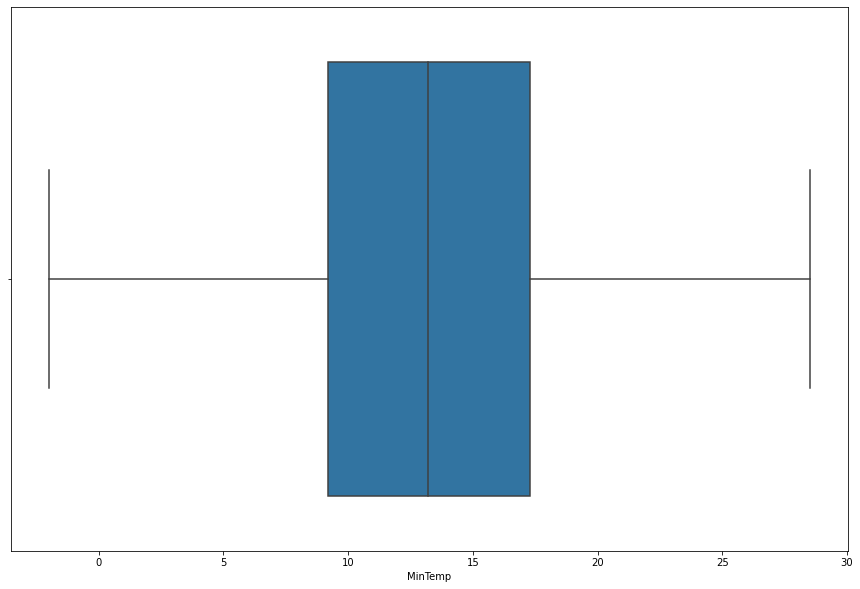



###############################################################################################################################


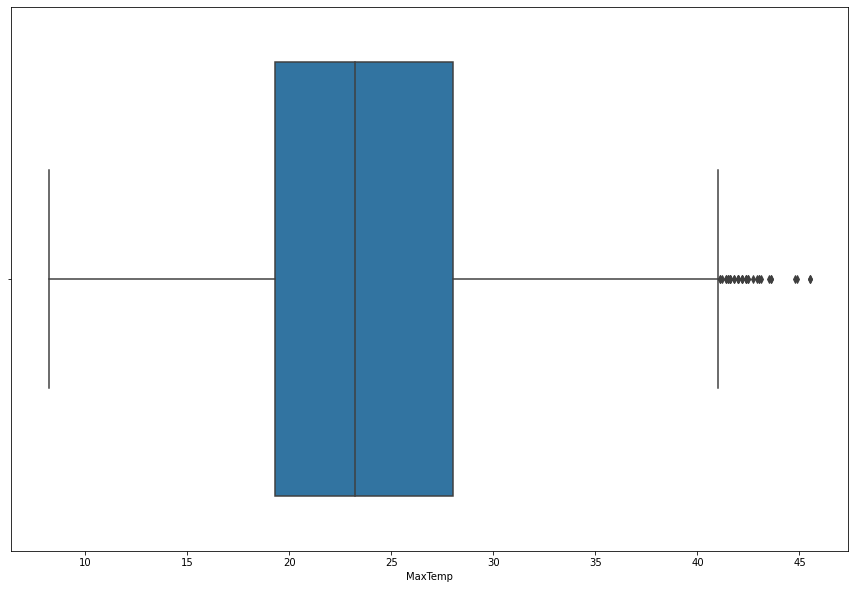



###############################################################################################################################


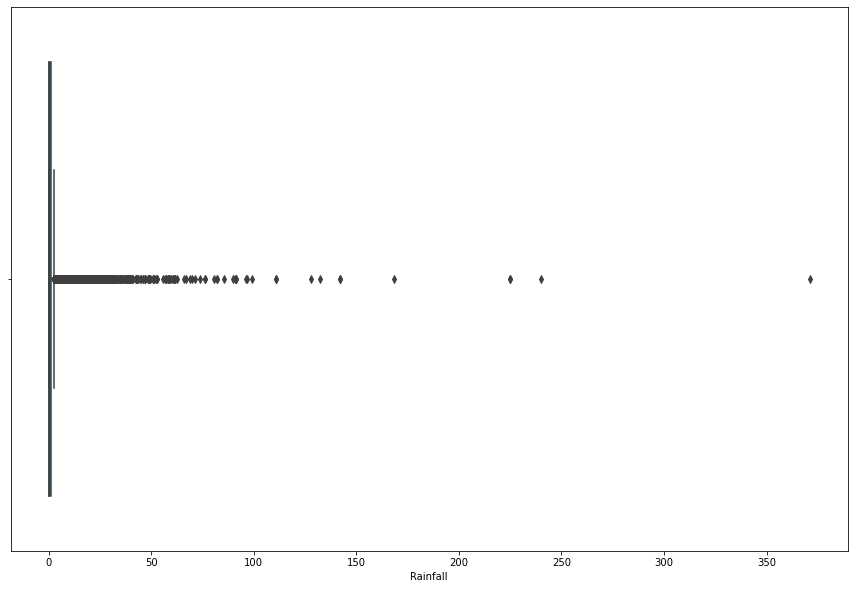



###############################################################################################################################


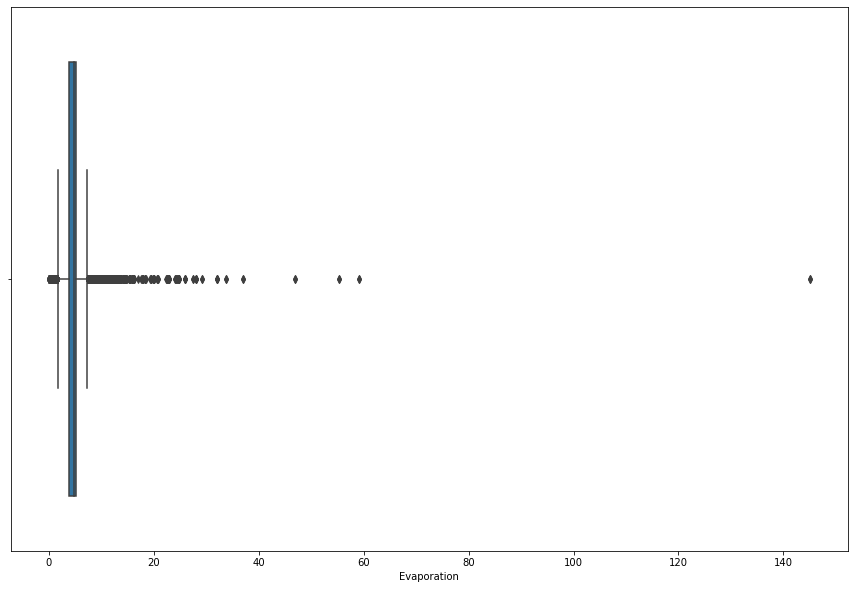



###############################################################################################################################


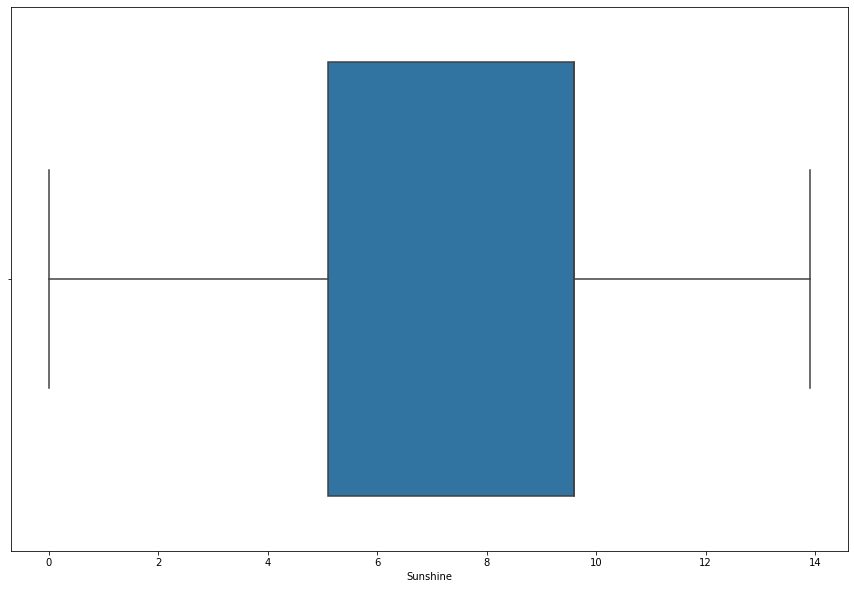



###############################################################################################################################


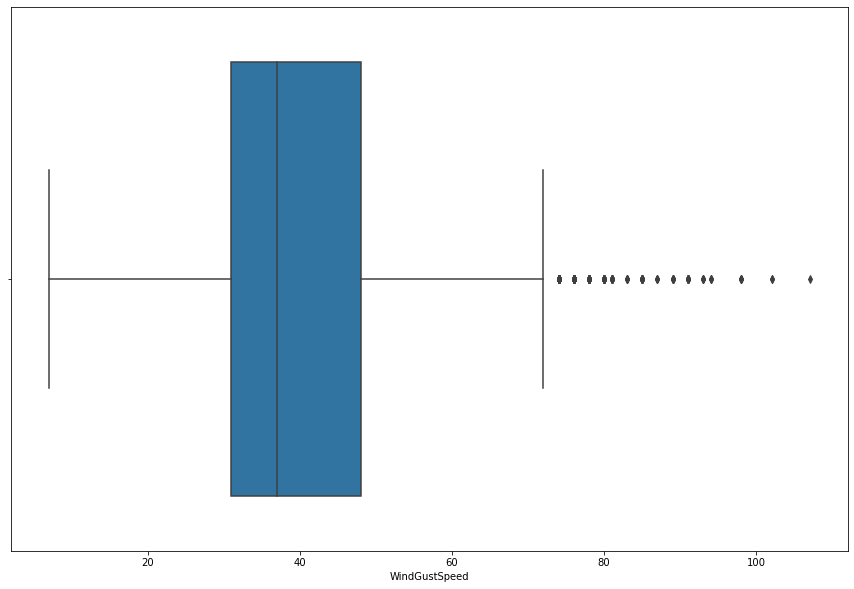



###############################################################################################################################


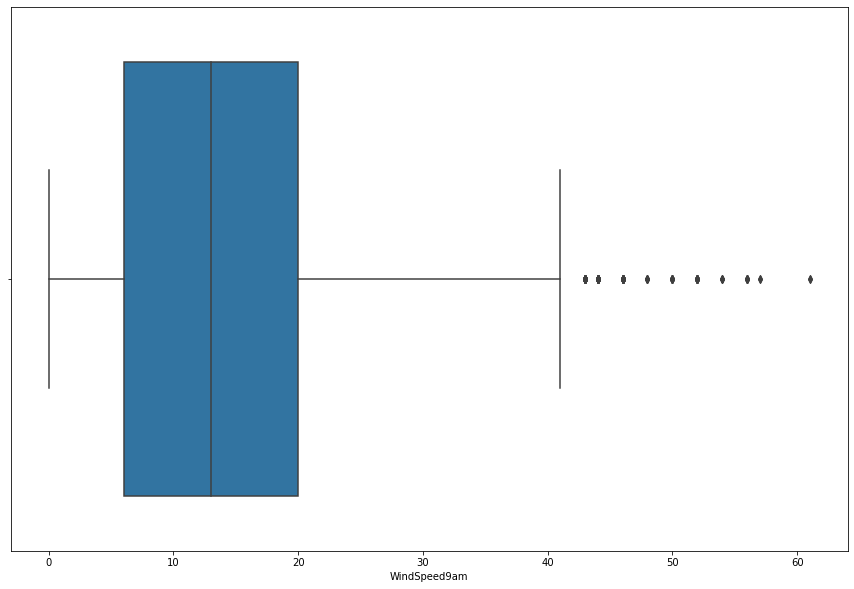



###############################################################################################################################


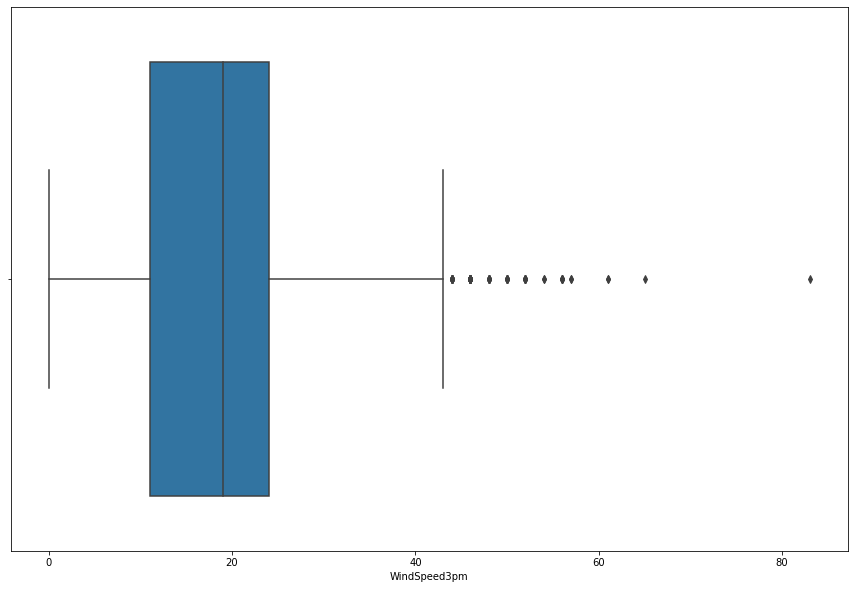



###############################################################################################################################


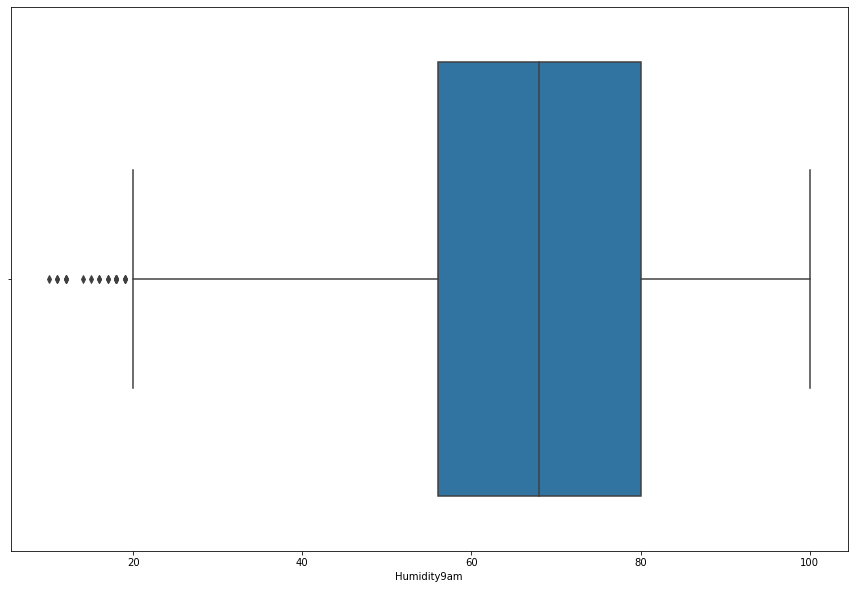



###############################################################################################################################


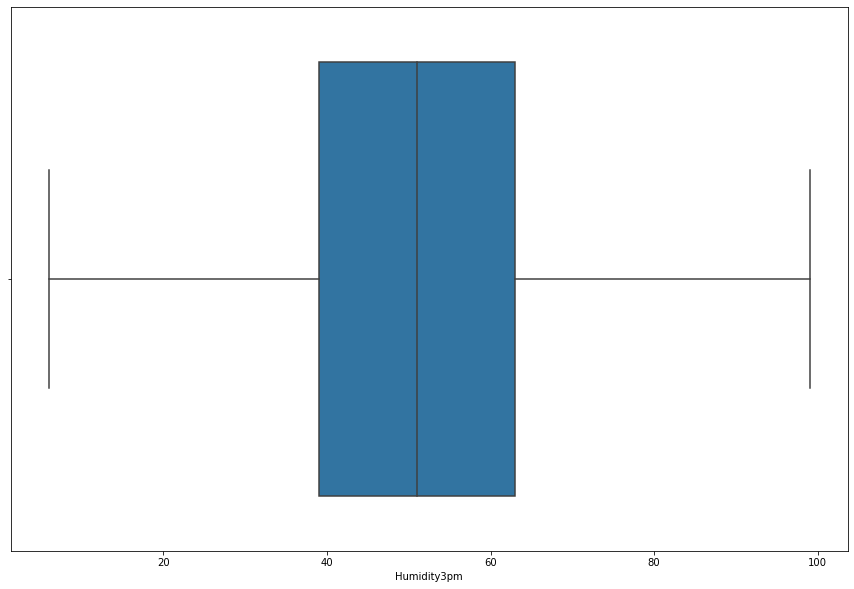



###############################################################################################################################


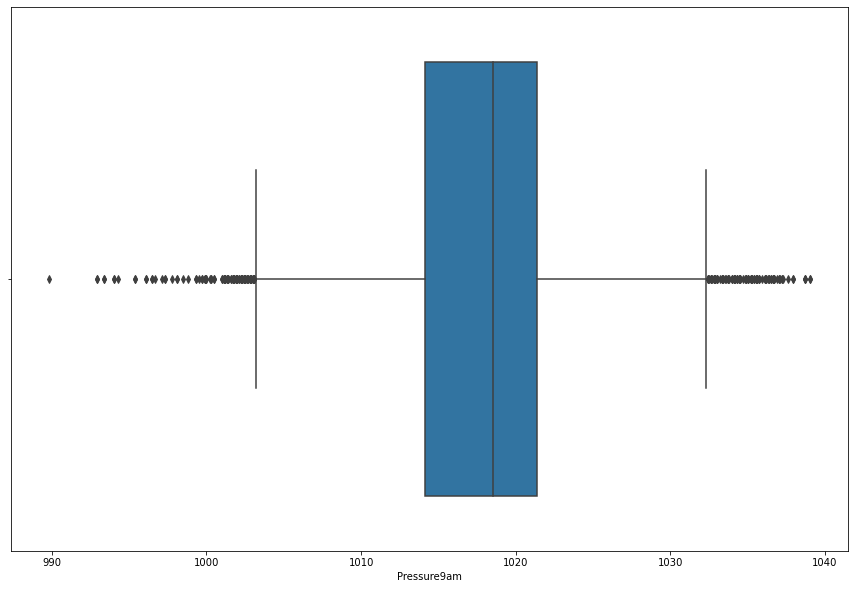



###############################################################################################################################


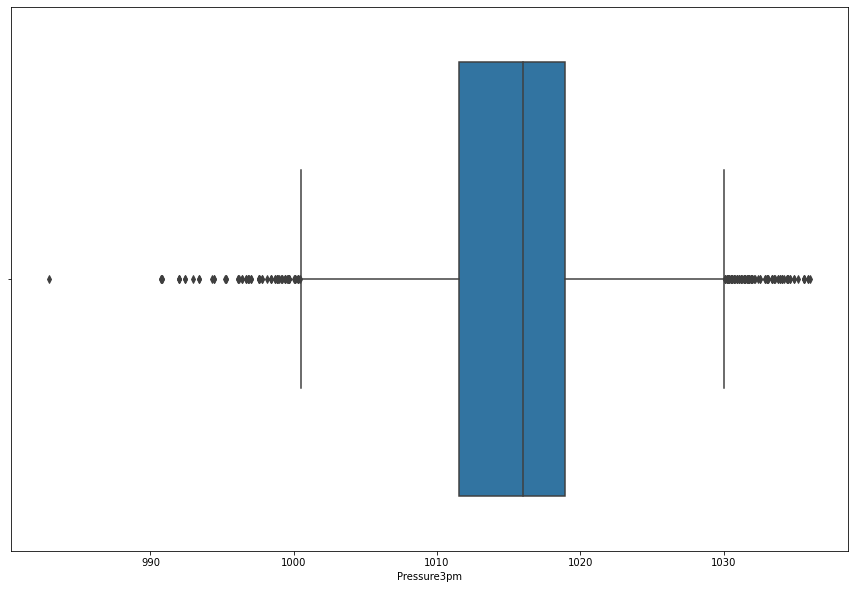



###############################################################################################################################


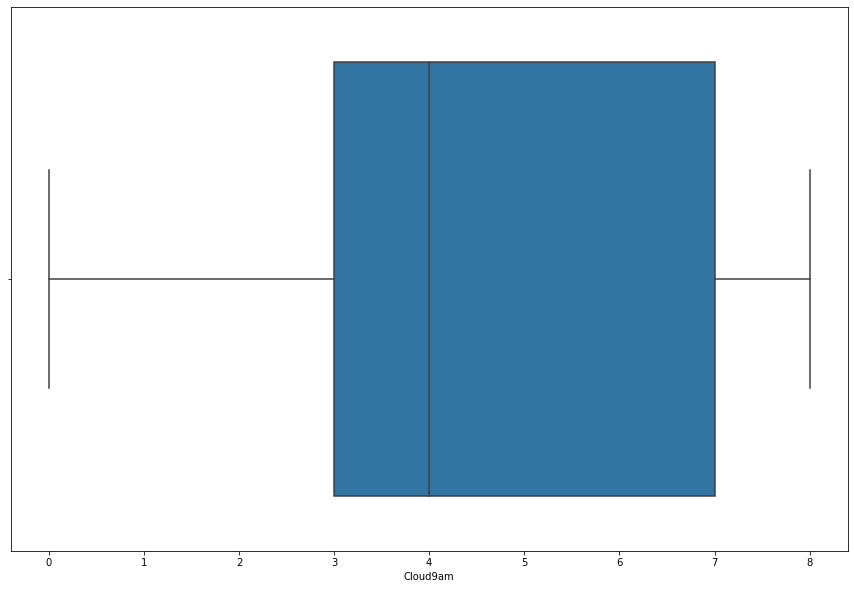



###############################################################################################################################


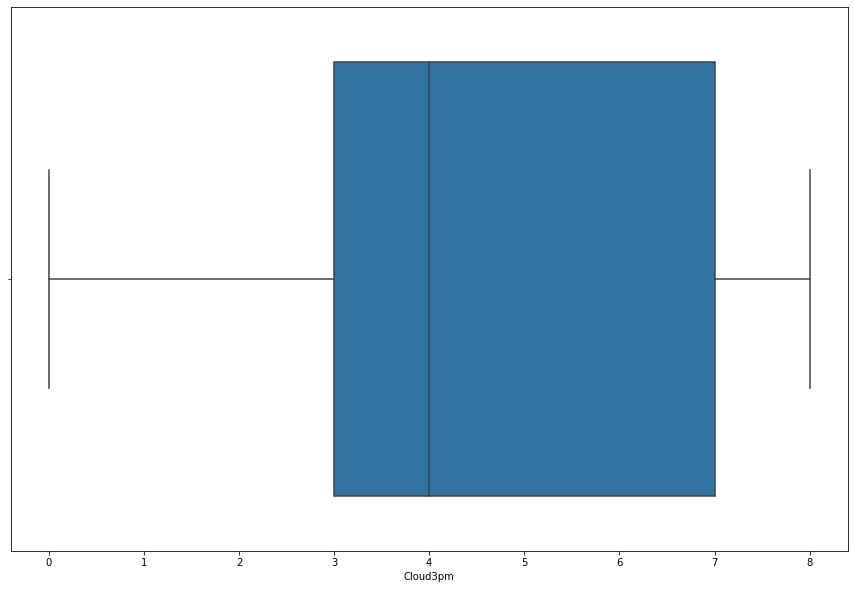



###############################################################################################################################


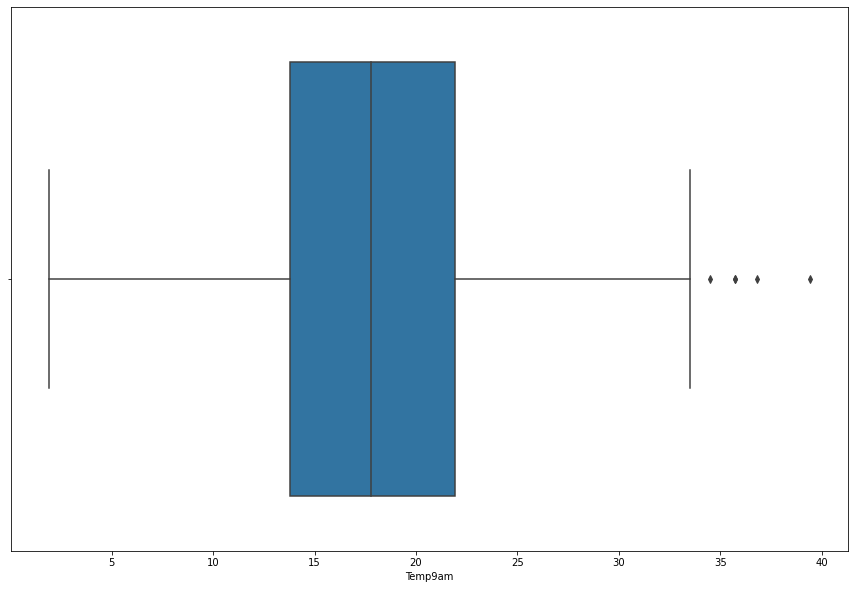



###############################################################################################################################


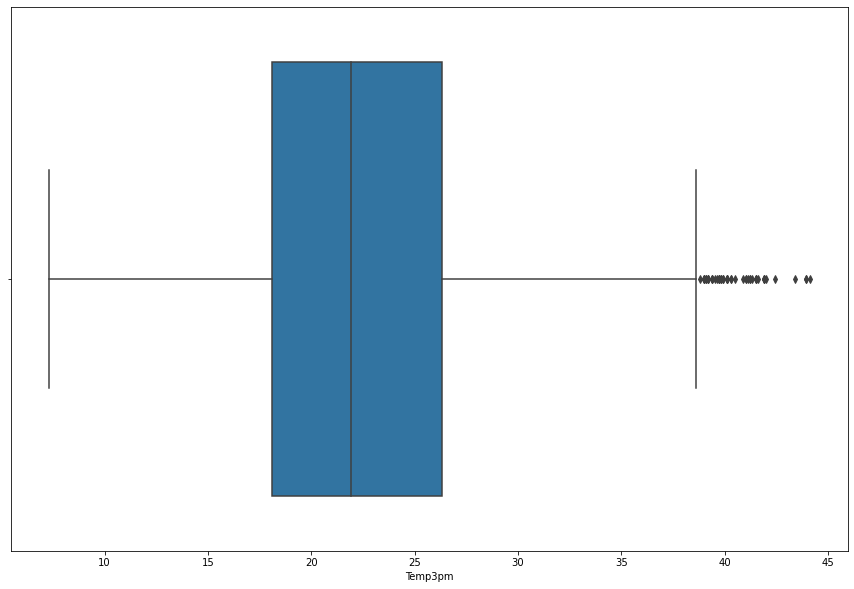



###############################################################################################################################


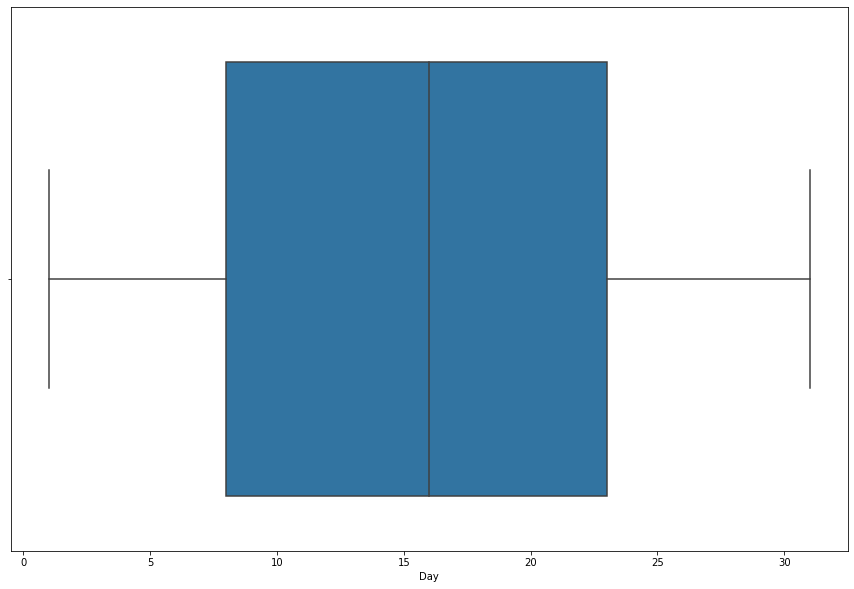



###############################################################################################################################


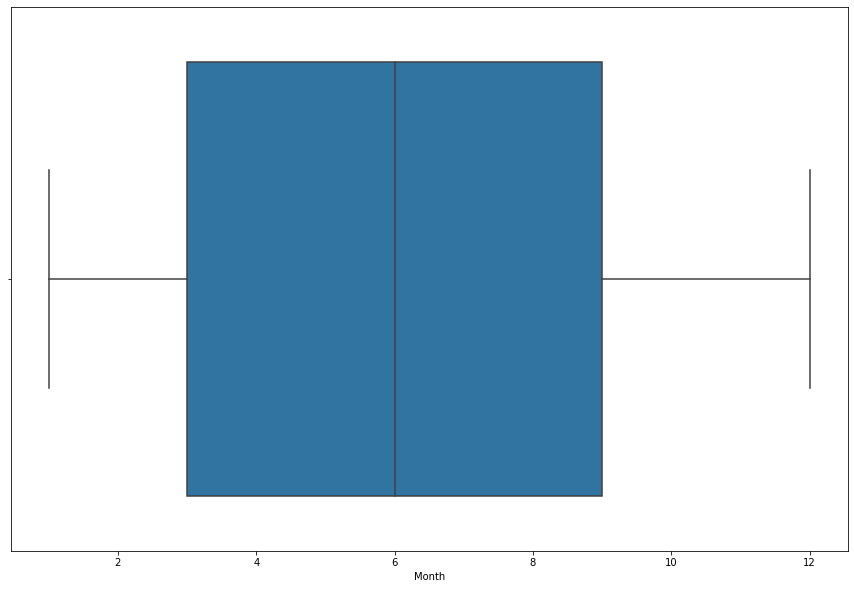



###############################################################################################################################


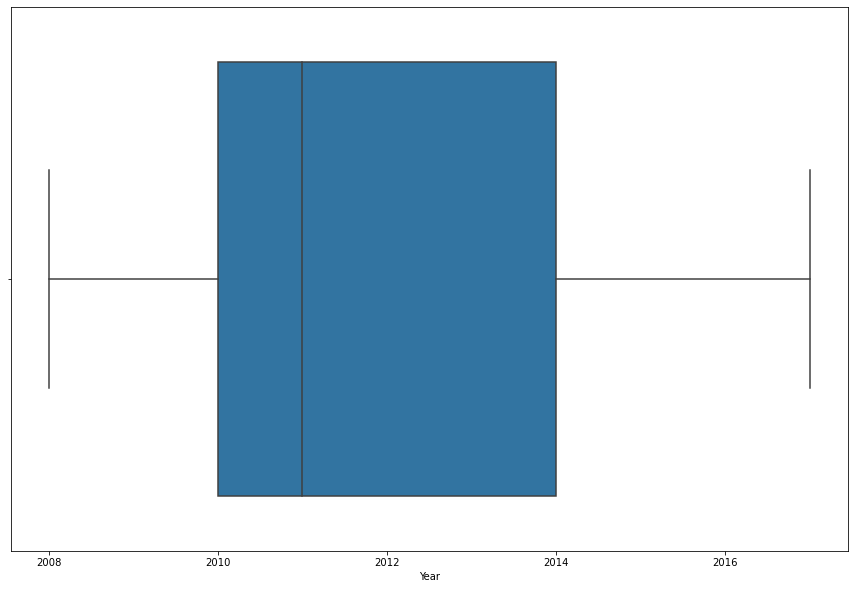



###############################################################################################################################


In [144]:
list_o=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']
for i in list_o:
    plt.figure(figsize=(15,10))
    sns.boxplot(df[i])
    plt.show()
    print('\n')
    print("#"*127)

# Remove The Outliers From The DataFrame By Zscore

In [145]:
from scipy.stats import zscore

In [146]:
outliers_columns=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

In [147]:
z=np.abs(zscore(outliers_columns))
z

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     0.635614  1.319429  0.267290     0.322215  1.168101       2.912631   
1     0.047988  1.073923  0.267290     0.322215  1.168101       0.710912   
2     0.509881  0.350013  0.057460     0.322215  1.168101       0.638442   
3     0.509881  0.857393  1.220596     0.322215  1.168101       1.535685   
4     0.177318  0.480950  0.267290     0.322215  1.168101       1.290679   
...        ...       ...       ...          ...       ...            ...   
8181  1.781108  0.333646  0.267290     0.067812  0.497480       0.638442   
8182  1.910438  0.071773  0.267290     0.067812  0.497480       0.638442   
8183  1.762633  0.239202  0.267290     0.067812  0.497480       1.290679   
8184  1.430070  0.501075  0.267290     0.067812  0.497480       0.203616   
8185  0.986652  0.517442  0.267290     0.067812  0.497480       0.855854   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Pressure9am  Pressure3pm  \
0         0.663903      0.987293     1.528696     1.405006     1.887671   
1         0.322810      1.276432     1.172316     0.943652     1.066252   
2         0.125467      0.556156     1.262944     1.150466     1.791033   
3         1.408193      0.987293     0.490788     3.727681     3.594933   
4         0.269218      0.967742     0.075012     0.880018     0.792446   
...            ...           ...          ...          ...          ...   
8181      0.125467      0.556156     0.518954     1.108574     0.947029   
8182      0.071875      0.761949     0.994126     1.092666     0.802073   
8183      0.071875      0.967742     0.697143     0.917670     0.608798   
8184      0.466560      0.967742     0.875333     0.519951     0.238354   
8185      0.071875      1.173536     0.994126     0.265411     0.190035   

       Temp9am   Temp3pm  
0     0.097233  1.307763  
1     0.471412  1.071973  
2     0.330400  0.915397  
3     0.063130  1.117503  
4     0.098766  0.730134  
...        ...       ...  
8181  1.488574  0.258554  
8182  1.363848  0.005923  
8183  1.221303  0.347762  
8184  0.936214  0.617236  
8185  0.472945  0.600394  

[8079 rows x 13 columns]

In [148]:
threshold=3
print(np.where(z>3))

(array([   3,    3,    7,    7,   15,   58,   67,   83,   83,   90,   95,
        110,  145,  145,  150,  153,  165,  165,  168,  176,  178,  211,
        221,  231,  232,  232,  232,  243,  244,  246,  264,  266,  267,
        288,  303,  304,  333,  350,  351,  365,  366,  367,  382,  389,
        407,  411,  440,  492,  501,  514,  552,  588,  613,  630,  660,
        661,  706,  707,  709,  711,  713,  723,  735,  735,  736,  741,
        741,  741,  765,  767,  770,  777,  784,  784,  811,  831,  833,
        869,  884,  886,  889,  914,  915,  917,  919,  921,  931,  943,
        943,  944,  949,  949,  949,  973,  975,  978,  985,  992,  992,
       1019, 1039, 1041, 1077, 1092, 1094, 1097, 1109, 1109, 1115, 1117,
       1117, 1132, 1138, 1139, 1146, 1158, 1183, 1187, 1187, 1187, 1188,
       1190, 1196, 1197, 1200, 1200, 1208, 1228, 1228, 1238, 1272, 1272,
       1273, 1274, 1274, 1274, 1276, 1282, 1284, 1289, 1290, 1290, 1296,
       1298, 1298, 1313, 1319, 1320, 1327, 1339, 1

In [149]:
df_new=df[(z<3).all(axis=1)]
df_new

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      Albury      9.7     31.9       0.0          3.8       4.2         NNW   
1      Albury     13.4     30.4       0.0          3.8       4.2           N   
2      Albury     15.9     21.7       2.2          3.8       4.2         NNE   
4      Albury     14.1     20.9       0.0          3.8       4.2         ENE   
5      Albury     13.5     22.9      16.8          3.8       4.2           W   
...       ...      ...      ...       ...          ...       ...         ...   
8181    Uluru      3.5     21.8       0.0          4.8       9.6           E   
8182    Uluru      2.8     23.4       0.0          4.8       9.6           E   
8183    Uluru      3.6     25.3       0.0          4.8       9.6         NNW   
8184    Uluru      5.4     26.9       0.0          4.8       9.6           N   
8185    Uluru      7.8     27.0       0.0          4.8       9.6          SE   

      WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
0              80.0         SE         NW  ...       1003.6       7.0   
1              30.0        SSE        ESE  ...       1008.7       7.0   
2              31.0         NE        ENE  ...       1004.2       8.0   
4              22.0        SSW          E  ...       1010.4       8.0   
5              63.0          N        WNW  ...       1002.2       8.0   
...             ...        ...        ...  ...          ...       ...   
8181           31.0        ESE          E  ...       1021.2       4.0   
8182           31.0         SE        ENE  ...       1020.3       4.0   
8183           22.0         SE          N  ...       1019.1       4.0   
8184           37.0         SE        WNW  ...       1016.8       4.0   
8185           28.0        SSE          N  ...       1016.5       3.0   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0          7.0     18.3     30.2         No           Yes    9     12  2008  
1          7.0     20.4     28.8         No           Yes   11     12  2008  
2          8.0     15.9     17.0        Yes           Yes   12     12  2008  
4          1.0     17.2     18.1         No           Yes   17     12  2008  
5          1.0     18.0     21.5        Yes           Yes   18     12  2008  
...        ...      ...      ...        ...           ...  ...    ...   ...  
8181       4.0      9.4     20.9         No            No   20      6  2017  
8182       4.0     10.1     22.4         No            No   21      6  2017  
8183       4.0     10.9     24.5         No            No   22      6  2017  
8184       4.0     12.5     26.1         No            No   23      6  2017  
8185       2.0     15.1     26.0         No            No   24      6  2017  

[7663 rows x 25 columns]

# Now No outliers present in the df_new dataframe.

In [150]:
percentage_of_dataloss=((8425-7663)/8425)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 9.044510385756677


# LabelEncoding

In [151]:
df_new.nunique().to_frame('unique values')

unique values
Location                  12
MinTemp                  282
MaxTemp                  319
Rainfall                 172
Evaporation               82
Sunshine                 140
WindGustDir               16
WindGustSpeed             41
WindDir9am                16
WindDir3pm                16
WindSpeed9am              25
WindSpeed3pm              26
Humidity9am               83
Humidity3pm               94
Pressure9am              344
Pressure3pm              344
Cloud9am                   9
Cloud3pm                   9
Temp9am                  300
Temp3pm                  312
RainToday                  2
RainTomorrow               2
Day                       31
Month                     12
Year                      10

In [152]:
categorical_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [153]:
list_c=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [154]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_c:
    df_new[i]=le.fit_transform(df_new[i]).astype(float)

In [155]:
df_new.head(20)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        1.0      9.7     31.9       0.0          3.8       4.2          6.0   
1        1.0     13.4     30.4       0.0          3.8       4.2          3.0   
2        1.0     15.9     21.7       2.2          3.8       4.2          5.0   
4        1.0     14.1     20.9       0.0          3.8       4.2          1.0   
5        1.0     13.5     22.9      16.8          3.8       4.2         13.0   
6        1.0     19.7     27.2       0.0          3.8       4.2         14.0   
8        1.0     16.1     21.6       0.0          3.8       4.2          9.0   
9        1.0     15.5     32.0       0.0          3.8       4.2          4.0   
10       1.0     20.9     25.7       0.0          3.8       4.2         13.0   
11       1.0     17.1     25.8       5.8          3.8       4.2          1.0   
12       1.0     16.4     27.0       3.0          3.8       4.2         12.0   
13       1.0     15.4     22.3       0.4          3.8       4.2          1.0   
14       1.0     14.3     32.1       0.0          3.8       4.2          4.0   
16       1.0     11.6     26.7       0.0          3.8       4.2         13.0   
17       1.0     13.0     24.9       8.4          3.8       4.2         13.0   
18       1.0     10.6     16.2       0.0          3.8       4.2         14.0   
19       1.0     12.9     15.8      20.0          3.8       4.2         13.0   
20       1.0      8.6     12.9      21.0          3.8       4.2          6.0   
21       1.0      4.5     11.5       3.2          3.8       4.2          7.0   
22       1.0     10.3     16.6       0.0          3.8       4.2         14.0   

    WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0            80.0         9.0         7.0  ...       1003.6       7.0   
1            30.0        10.0         2.0  ...       1008.7       7.0   
2            31.0         4.0         1.0  ...       1004.2       8.0   
4            22.0        11.0         0.0  ...       1010.4       8.0   
5            63.0         3.0        14.0  ...       1002.2       8.0   
6            46.0         7.0        15.0  ...       1004.2       7.0   
8            46.0        10.0         4.0  ...       1017.3       2.0   
9            50.0         2.0         0.0  ...       1016.2       7.0   
10           37.0         1.0         8.0  ...       1018.9       7.0   
11           31.0         3.0         8.0  ...       1014.7       8.0   
12           69.0         0.0         3.0  ...       1008.0       7.0   
13           30.0        10.0        10.0  ...       1019.2       8.0   
14           28.0         3.0         1.0  ...       1018.4       7.0   
16           48.0         9.0         4.0  ...       1017.7       8.0   
17           46.0         8.0         0.0  ...       1020.3       8.0   
18           39.0         2.0         5.0  ...       1002.4       8.0   
19           70.0        14.0         6.0  ...       1000.9       8.0   
20           63.0         7.0        14.0  ...       1003.3       8.0   
21           26.0         3.0         6.0  ...       1013.5       8.0   
22           54.0         7.0         7.0  ...       1011.0       8.0   

    Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0        7.0     18.3     30.2        0.0           1.0    9     12  2008  
1        7.0     20.4     28.8        0.0           1.0   11     12  2008  
2        8.0     15.9     17.0        1.0           1.0   12     12  2008  
4        1.0     17.2     18.1        0.0           1.0   17     12  2008  
5        1.0     18.0     21.5        1.0           1.0   18     12  2008  
6        7.0     21.6     26.1        0.0           1.0   29     12  2008  
8        8.0     17.0     17.3        0.0           1.0   12      2  2009  
9        7.0     20.1     30.8        0.0           1.0   10      3  2009  
10       8.0     22.2     18.8        0.0           1.0   12      3  2009  
11       7.0     19.0     23.

In [156]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7663 entries, 0 to 8185
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7663 non-null   float64
 1   MinTemp        7663 non-null   float64
 2   MaxTemp        7663 non-null   float64
 3   Rainfall       7663 non-null   float64
 4   Evaporation    7663 non-null   float64
 5   Sunshine       7663 non-null   float64
 6   WindGustDir    7663 non-null   float64
 7   WindGustSpeed  7663 non-null   float64
 8   WindDir9am     7663 non-null   float64
 9   WindDir3pm     7663 non-null   float64
 10  WindSpeed9am   7663 non-null   float64
 11  WindSpeed3pm   7663 non-null   float64
 12  Humidity9am    7663 non-null   float64
 13  Humidity3pm    7663 non-null   float64
 14  Pressure9am    7663 non-null   float64
 15  Pressure3pm    7663 non-null   float64
 16  Cloud9am       7663 non-null   float64
 17  Cloud3pm       7663 non-null   float64
 18  Temp9am 

# Dividing data in features and Label

In [157]:
x=df_new.drop("RainTomorrow",axis=1) #Independent variable
y=df_new.iloc[:,-4] #Dependent variable

In [158]:
x

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0          1.0      9.7     31.9       0.0          3.8       4.2   
1          1.0     13.4     30.4       0.0          3.8       4.2   
2          1.0     15.9     21.7       2.2          3.8       4.2   
4          1.0     14.1     20.9       0.0          3.8       4.2   
5          1.0     13.5     22.9      16.8          3.8       4.2   
...        ...      ...      ...       ...          ...       ...   
8181       9.0      3.5     21.8       0.0          4.8       9.6   
8182       9.0      2.8     23.4       0.0          4.8       9.6   
8183       9.0      3.6     25.3       0.0          4.8       9.6   
8184       9.0      5.4     26.9       0.0          4.8       9.6   
8185       9.0      7.8     27.0       0.0          4.8       9.6   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
0             6.0           80.0         9.0         7.0  ...       1008.9   
1             3.0           30.0        10.0         2.0  ...       1011.8   
2             5.0           31.0         4.0         1.0  ...       1010.5   
4             1.0           22.0        11.0         0.0  ...       1012.2   
5            13.0           63.0         3.0        14.0  ...       1005.8   
...           ...            ...         ...         ...  ...          ...   
8181          0.0           31.0         2.0         0.0  ...       1024.7   
8182          0.0           31.0         9.0         1.0  ...       1024.6   
8183          6.0           22.0         9.0         3.0  ...       1023.5   
8184          3.0           37.0         9.0        14.0  ...       1021.0   
8185          9.0           28.0        10.0         3.0  ...       1019.4   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Day  \
0          1003.6       7.0       7.0     18.3     30.2        0.0    9   
1          1008.7       7.0       7.0     20.4     28.8        0.0   11   
2          1004.2       8.0       8.0     15.9     17.0        1.0   12   
4          1010.4       8.0       1.0     17.2     18.1        0.0   17   
5          1002.2       8.0       1.0     18.0     21.5        1.0   18   
...           ...       ...       ...      ...      ...        ...  ...   
8181       1021.2       4.0       4.0      9.4     20.9        0.0   20   
8182       1020.3       4.0       4.0     10.1     22.4        0.0   21   
8183       1019.1       4.0       4.0     10.9     24.5        0.0   22   
8184       1016.8       4.0       4.0     12.5     26.1        0.0   23   
8185       1016.5       3.0       2.0     15.1     26.0        0.0   24   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
4        12  2008  
5        12  2008  
...     ...   ...  
8181      6  2017  
8182      6  2017  
8183      6  2017  
8184      6  2017  
8185      6  2017  

[7663 rows x 24 columns]

In [159]:
y

0       1.0
1       1.0
2       1.0
4       1.0
5       1.0
       ... 
8181    0.0
8182    0.0
8183    0.0
8184    0.0
8185    0.0
Name: RainTomorrow, Length: 7663, dtype: float64

# Checking VIF score

In [160]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [161]:
len(numerical_columns)

19

In [162]:
p=x[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Day','Month','Year']]

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [165]:
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif["features"]=p.columns
    print(vif)

In [166]:
vif_clac()

       VIF Factor       features
0       58.226518        MinTemp
1      428.231075        MaxTemp
2        1.419604       Rainfall
3        8.476148    Evaporation
4       16.206798       Sunshine
5       22.841686  WindGustSpeed
6        5.875466   WindSpeed9am
7        9.231133   WindSpeed3pm
8       67.534248    Humidity9am
9       48.481854    Humidity3pm
10  518536.993289    Pressure9am
11  519092.043543    Pressure3pm
12       8.354604       Cloud9am
13       8.678990       Cloud3pm
14     188.983176        Temp9am
15     512.768419        Temp3pm
16       4.200768            Day
17       5.248096          Month
18   42847.736841           Year


In [167]:
p=p.drop("Pressure3pm",axis=1)

In [168]:
p=p.drop("Year",axis=1)

In [169]:
vif_clac()

    VIF Factor       features
0    57.134546        MinTemp
1   426.229272        MaxTemp
2     1.396543       Rainfall
3     8.367375    Evaporation
4    16.197184       Sunshine
5    21.057402  WindGustSpeed
6     5.831086   WindSpeed9am
7     9.151199   WindSpeed3pm
8    66.946179    Humidity9am
9    47.471091    Humidity3pm
10  157.244949    Pressure9am
11    8.331475       Cloud9am
12    8.638453       Cloud3pm
13  185.360951        Temp9am
14  490.158661        Temp3pm
15    4.193432            Day
16    5.220746          Month


we can see that VIF score of Temp3pm column is very high.So we drop this column for geting best accuracy score from our model.

In [170]:
p=p.drop("Temp3pm",axis=1)

In [171]:
vif_clac()

    VIF Factor       features
0    56.987432        MinTemp
1   142.832318        MaxTemp
2     1.395504       Rainfall
3     8.367235    Evaporation
4    16.195444       Sunshine
5    20.941700  WindGustSpeed
6     5.828463   WindSpeed9am
7     9.103755   WindSpeed3pm
8    59.019499    Humidity9am
9    33.249208    Humidity3pm
10  147.989493    Pressure9am
11    8.331064       Cloud9am
12    8.582026       Cloud3pm
13  172.694457        Temp9am
14    4.192869            Day
15    5.148681          Month


we can see that VIF score of Temp9am column is very high.So we drop this column for geting best accuracy score from our model.

In [172]:
p=p.drop("Temp9am",axis=1)

In [173]:
vif_clac()

    VIF Factor       features
0    29.530688        MinTemp
1    80.997650        MaxTemp
2     1.391472       Rainfall
3     8.361534    Evaporation
4    16.152566       Sunshine
5    20.711458  WindGustSpeed
6     5.744571   WindSpeed9am
7     8.865436   WindSpeed3pm
8    42.328267    Humidity9am
9    26.421086    Humidity3pm
10  144.435258    Pressure9am
11    8.232431       Cloud9am
12    8.570272       Cloud3pm
13    4.191594            Day
14    5.098709          Month


we can see that VIF score of Pressure9am column is very high.So we drop this column for geting best accuracy score from our model.

In [174]:
p=p.drop("Pressure9am",axis=1)

In [175]:
vif_clac()

    VIF Factor       features
0    25.693005        MinTemp
1    55.166374        MaxTemp
2     1.375738       Rainfall
3     8.361256    Evaporation
4    13.545997       Sunshine
5    20.035696  WindGustSpeed
6     5.316024   WindSpeed9am
7     8.865418   WindSpeed3pm
8    33.882476    Humidity9am
9    23.101328    Humidity3pm
10    8.050070       Cloud9am
11    8.360536       Cloud3pm
12    4.128949            Day
13    4.731137          Month


In [176]:
x=x.drop(["Pressure9am","Temp9am","Temp3pm","Year","Pressure3pm"],axis=1)

In [177]:
x.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0       1.0      9.7     31.9       0.0          3.8       4.2          6.0   
1       1.0     13.4     30.4       0.0          3.8       4.2          3.0   
2       1.0     15.9     21.7       2.2          3.8       4.2          5.0   
4       1.0     14.1     20.9       0.0          3.8       4.2          1.0   
5       1.0     13.5     22.9      16.8          3.8       4.2         13.0   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           80.0         9.0         7.0           7.0          28.0   
1           30.0        10.0         2.0          17.0           6.0   
2           31.0         4.0         1.0          15.0          13.0   
4           22.0        11.0         0.0          11.0           9.0   
5           63.0         3.0        14.0           6.0          20.0   

   Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  RainToday  Day  Month  
0         42.0          9.0       7.0       7.0        0.0    9     12  
1         48.0         22.0       7.0       7.0        0.0   11     12  
2         89.0         91.0       8.0       8.0        1.0   12     12  
4         69.0         82.0       8.0       1.0        0.0   17     12  
5         80.0         65.0       8.0       1.0        1.0   18     12

# Oversampling

In [178]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [179]:
x,y=smt.fit_resample(x,y)

In [180]:
x.value_counts()

Location   MinTemp    MaxTemp    Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  RainToday  Day  Month
10.000000  21.800000  31.400000  4.800000  3.800000     4.200000  13.000000    28.000000      3.000000    9.000000    0.000000      19.000000     83.000000    62.000000    8.000000  7.000000  1.000000   22   1        6
5.000000   16.700000  26.500000  0.600000  6.200000     0.200000  3.000000     65.000000      3.000000    4.000000    24.000000     24.000000     64.000000    61.000000    7.000000  7.000000  0.000000   30   10       6
10.000000  10.100000  20.200000  1.800000  3.800000     4.200000  9.000000     22.000000      7.000000    8.000000    13.000000     15.000000     100.000000   66.000000    8.000000  7.000000  1.000000   12   6        6
5.000000   20.100000  26.300000  7.000000  1.000000     0.000000  9.000000     33.000000      1.000000    2.000000    9.000000   

In [181]:
y.value_counts()

1.0    5903
0.0    5903
Name: RainTomorrow, dtype: int64

we can see that; number of o = number of 1
so the class of target column is balanced now

# Transforming data to remove skewness

In [182]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.63040984e+00, -7.01856476e-01,  1.41778377e+00, ...,
        -7.33833986e-01, -6.78906117e-01,  1.65179563e+00],
       [-1.63040984e+00,  4.40423466e-04,  1.20585599e+00, ...,
        -7.33833986e-01, -4.30506932e-01,  1.65179563e+00],
       [-1.63040984e+00,  4.75217054e-01, -1.75472955e-01, ...,
         1.43766812e+00, -3.10878930e-01,  1.65179563e+00],
       ...,
       [-1.25128368e+00,  1.54190078e+00,  1.30768101e+00, ...,
         6.93516032e-01, -6.78906117e-01, -1.35536527e+00],
       [ 1.62041155e+00,  9.37801566e-01,  4.60342025e-01, ...,
         2.36250763e-01,  4.63843518e-01, -1.35536527e+00],
       [-2.18342997e-01,  2.35293437e-01,  2.66167363e-01, ...,
         1.43766812e+00, -6.78906117e-01, -1.77885620e+00]])

In [183]:
df_new1=pd.DataFrame(x)
df_new1.skew()

0    -0.170268
1    -0.100493
2    -0.011317
3     0.624761
4     0.038451
5    -0.193013
6    -0.181767
7    -0.003234
8    -0.149108
9    -0.228490
10   -0.114235
11   -0.084119
12   -0.101020
13   -0.068007
14   -0.401146
15   -0.352031
16    0.669269
17   -0.204008
18   -0.127829
dtype: float64

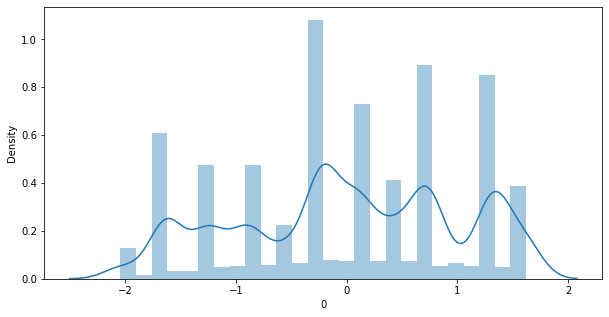

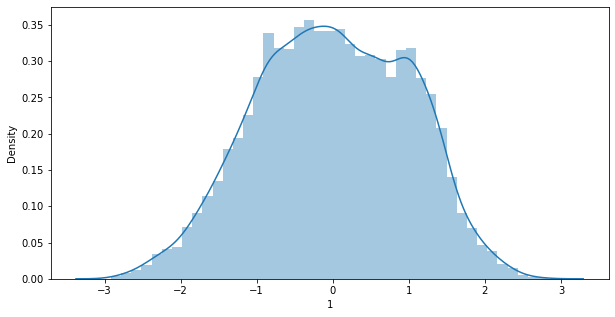

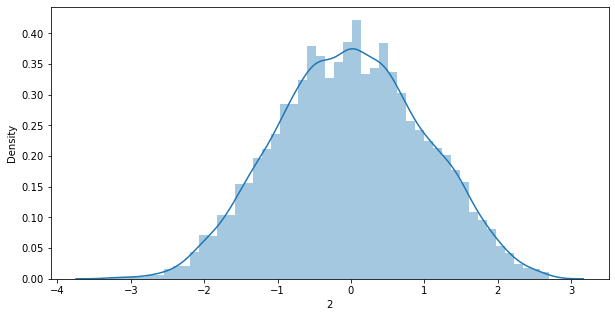

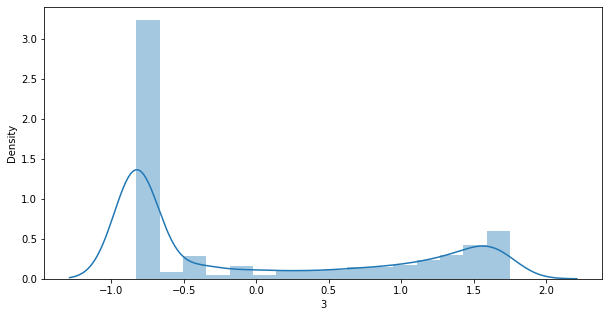

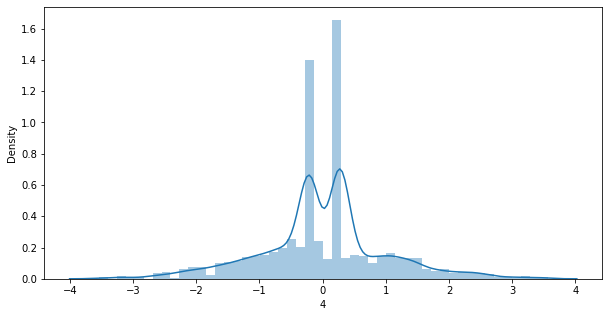

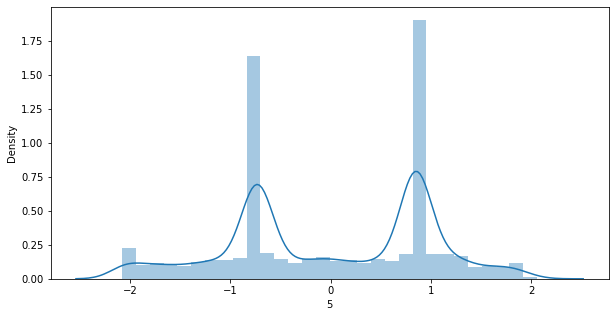

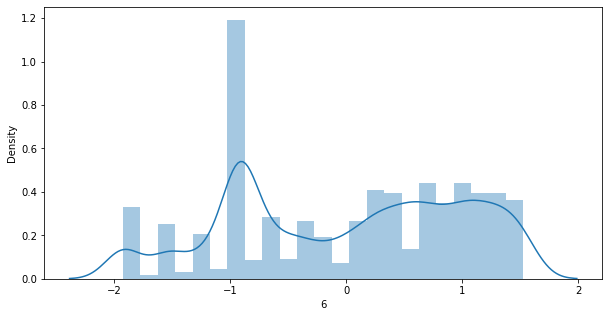

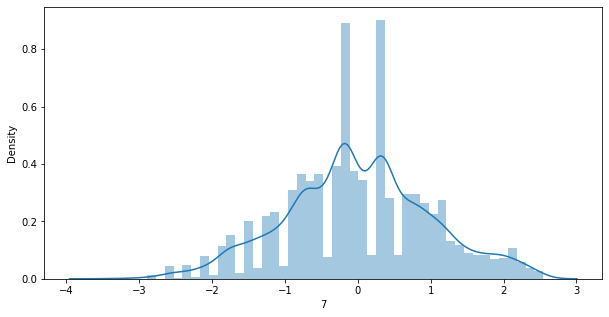

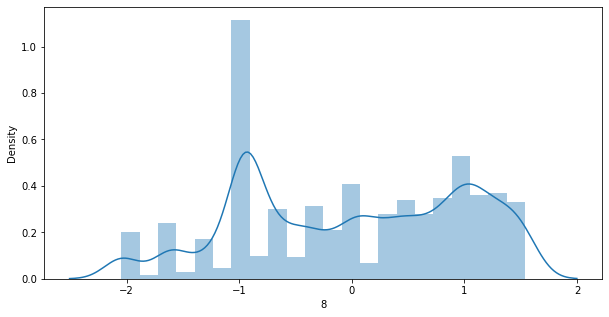

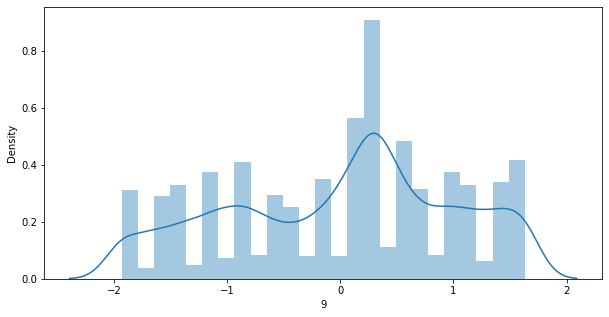

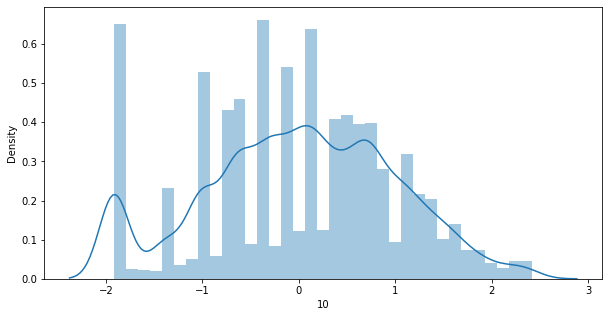

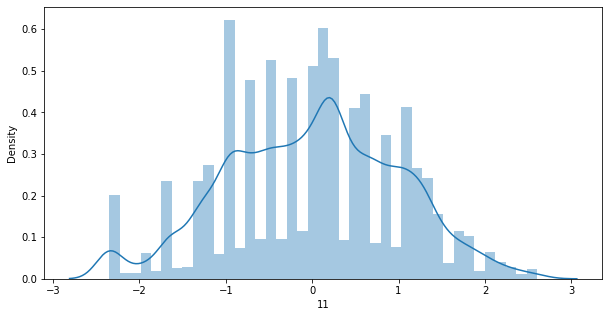

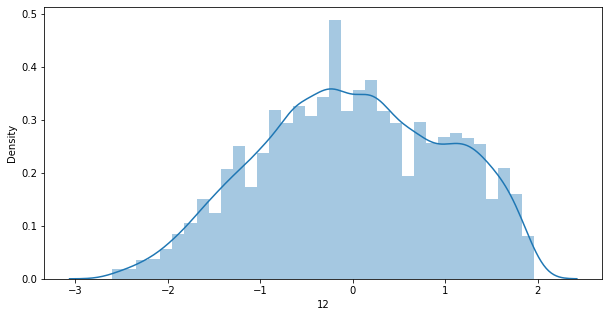

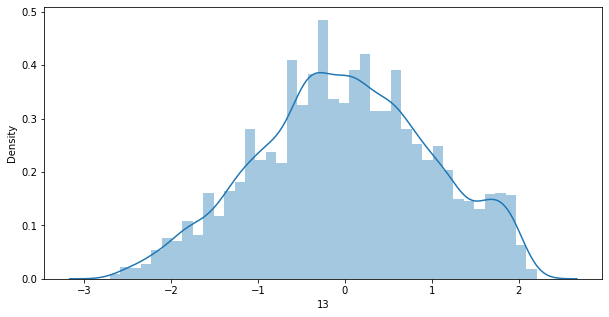

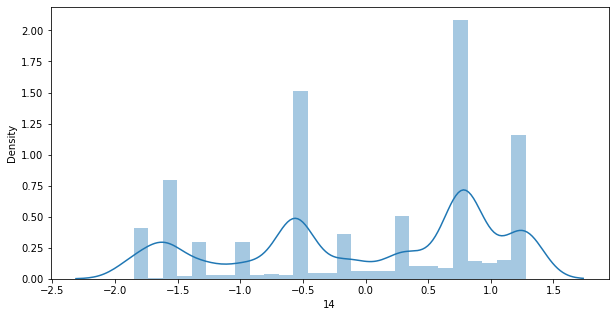

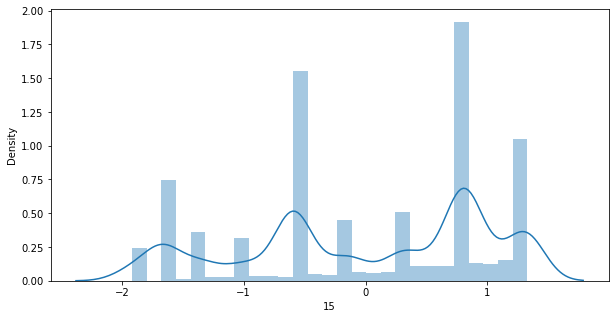

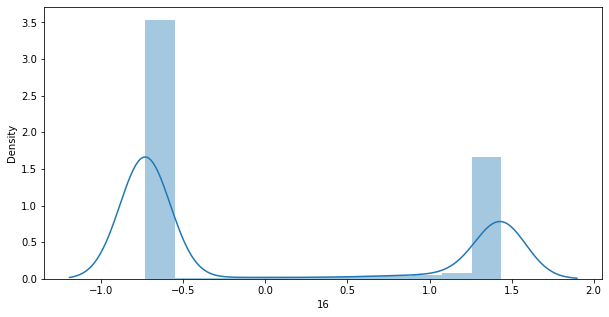

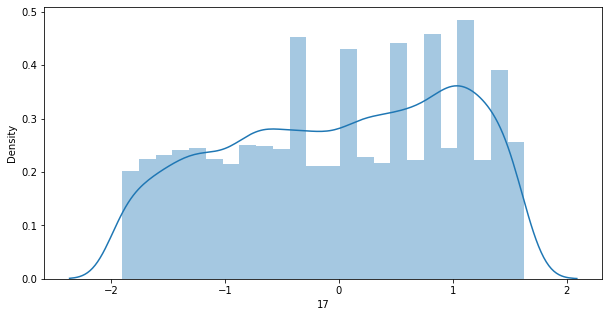

In [184]:
for i in range(18):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])    
    plt.show()

# STandard Scalar

In [185]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.63040984e+00, -7.01856476e-01,  1.41778377e+00, ...,
        -7.33833986e-01, -6.78906117e-01,  1.65179563e+00],
       [-1.63040984e+00,  4.40423466e-04,  1.20585599e+00, ...,
        -7.33833986e-01, -4.30506932e-01,  1.65179563e+00],
       [-1.63040984e+00,  4.75217054e-01, -1.75472955e-01, ...,
         1.43766812e+00, -3.10878930e-01,  1.65179563e+00],
       ...,
       [-1.25128368e+00,  1.54190078e+00,  1.30768101e+00, ...,
         6.93516032e-01, -6.78906117e-01, -1.35536527e+00],
       [ 1.62041155e+00,  9.37801566e-01,  4.60342025e-01, ...,
         2.36250763e-01,  4.63843518e-01, -1.35536527e+00],
       [-2.18342997e-01,  2.35293437e-01,  2.66167363e-01, ...,
         1.43766812e+00, -6.78906117e-01, -1.77885620e+00]])

# Model Building

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

In [187]:
x.shape

(11806, 19)

finding best random state

In [188]:
maxAccu=0
maxRS=0
for i in range(0,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.9009034443817052 on random state   1253


train test split

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)


In [193]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (8264, 19)
x_test shape = (3542, 19)
y_train shape = (8264,)
y_test shape = (3542,)


In [194]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

#creat a list of all above model
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [195]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*'*125)
    print('_'*125)
    print("\n")

Accuracy score of  LogisticRegression() is
0.9009034443817052
[[1573  185]
 [ 166 1618]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      1758
         1.0       0.90      0.91      0.90      1784

    accuracy                           0.90      3542
   macro avg       0.90      0.90      0.90      3542
weighted avg       0.90      0.90      0.90      3542

*****************************************************************************************************************************
_____________________________________________________________________________________________________________________________


Accuracy score of  GaussianNB() is
0.8385093167701864
[[1461  297]
 [ 275 1509]]
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      1758
         1.0       0.84      0.85      0.84      1784

    accuracy                           0.84      3542
   macro avg       0.84      0.

# Checking Cross Val Score

In [196]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print("\n")
    print('*'*125)
    print('*'*125)
    print("\n")

For CV = 2
cross validation score of LogisticRegression() is = 0.8462646112146366
cross validation score of GaussianNB() is = 0.8212773166186684
cross validation score of SVC() is = 0.8519396916821955
cross validation score of DecisionTreeClassifier() is = 0.7925631035066916
cross validation score of KNeighborsClassifier() is = 0.808148399119092
cross validation score of RandomForestClassifier() is = 0.8416906657631713
cross validation score of GradientBoostingClassifier() is = 0.7309842452990005
cross validation score of AdaBoostClassifier() is = 0.7254785702185329


*****************************************************************************************************************************
*****************************************************************************************************************************


For CV = 3
cross validation score of LogisticRegression() is = 0.8574451710209606
cross validation score of GaussianNB() is = 0.8200065727626781
cross validation score of 

we get best CV=8

# Parameter Tuning for RandomForestClassifier


In [197]:
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=8,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [198]:
gcv1.best_score_

0.925459825750242

In [199]:
gcv1.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

# Creating Final Model

In [200]:
final_model=gcv1.best_estimator_

In [201]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

Test Accuracy score of final model = 0.9407114624505929
Train Accuracy score of final model = 0.9535333978702807
[[1614  144]
 [ 130 1654]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1758
         1.0       0.92      0.93      0.92      1784

    accuracy                           0.92      3542
   macro avg       0.92      0.92      0.92      3542
weighted avg       0.92      0.92      0.92      3542



we can see that test accuravy score is very close to the test accracy score.so,our model is not underfit or overfit. so this our best model.we save this model for future prediction.

<AxesSubplot:>

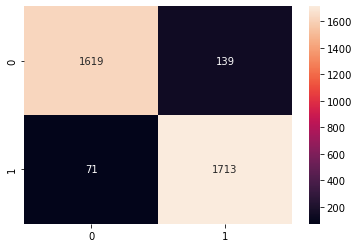

In [202]:
confusion_matrix(y_test,predm1)
sns.heatmap(confusion_matrix(y_test,predm1),annot=True, fmt='d')

# ROCAUC curve

In [203]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.02958639, 0.05107354, 0.08862202, ..., 0.79365257, 0.12201101,
       0.0498595 ])

In [204]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [205]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print("roc_auc_score=",auc_score)

roc_auc_score= 0.9405673359963675


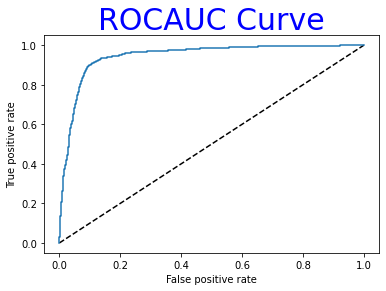

In [206]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROCAUC Curve',color='Blue',size=30)
plt.show()

# Model Saving

In [207]:
import joblib                                                                                                     
joblib.dump(final_model,'Rainfall Prediction Model.pkl')

['Rainfall Prediction Model.pkl']